# FIT5196 Assessment 2: Data Cleaning
#### Student Name: Akshay Sapra
#### Student ID: 29858186

Date: 09/05/2019

Environment: Python 3.6 and Jupyter notebook
Libraries used: 
>* **Pandas** to store and handle data in dataframes
>* **np** to get the shape and add condition to the dataframe
>* **networkx** to calculate the shortest distance and time 
>* **KNeighborsClassifier** is used to plot KNN model to predict regions
>* **train_test_split** to stplit the data into training andtesting
>* **LinearRegression** to build linear regression model
>* **matplotlib** for plotting
>* **seaborn** for residual plots


## 1. Introduction


As part of the second task provided to me, I had to clean the 3 files containing dirty data, outliers and missing data. 

File which contained **dirty data** had
>1. **Syntactic Anomalies**: 
describe characteristics concerning the format and values used for representation of the entities. Syntactic anomalies such as: lexical errors, domain format errors, syntactical error and irregularities.
>2. **Semantic Anomalies**: 
hinder the data collection from being a comprehensive and non-redundant representation of the mini-world. These types of anomalies include: Integrity constraint violations, contradictions, duplicates and invalid tuples
>3. **Coverage Anomalies**: 
decrease the amount of entities and entity properties from the mini-world that are represented in the data collection. Coverage anomalies are categorized as: missing values and missing tuples.

Files which contained missing data were 
>1. **Missing completely at random**: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
>2. **Missing at random:** This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.
>3. **Missing that depends on unobserved predictors**: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
>4. **Missing that depends on the missing value itself**: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.

Files which had outliers were 
>1. **Univariate Outliers** concerning the distribution of single variable i.e. fare column. 

## 2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.neighbors import KNeighborsClassifier
import time #to check if date is weekday
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


## 3. Reading Data

In [2]:
missing=pd.read_csv('29858186_missing_value.csv')
outliers=pd.read_csv('29858186_outliers.csv')
dirty=pd.read_csv('29858186_dirty_data.csv')
edge=pd.read_csv('edges.csv')
node=pd.read_csv('nodes.csv')

## 4. Cleaning Dirty Data

>#### EDA of Dirty Data file

In [3]:
# Checking number and columns of the dirty_data file
dirty.shape


(310, 14)

In [4]:
dirty.head()
#First 5 rows of the dataset to get gist of it.

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,3,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13174.9,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10413.9,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63


In [5]:
dirty.info()
# Checking the information of dirty data set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Unnamed: 0               310 non-null object
Uber Type                310 non-null int64
Origin Region            310 non-null int64
Destination Region       310 non-null int64
Origin Latitude          310 non-null float64
Origin Longitude         310 non-null float64
Destination Latitude     310 non-null float64
Destination Longitude    310 non-null float64
Journey Distance(m)      310 non-null float64
Departure Date           310 non-null object
Departure Time           310 non-null object
Travel Time(s)           310 non-null float64
Arrival Time             310 non-null object
Fare$                    310 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 34.0+ KB


In [6]:
dirty.describe()
#Primary Analysis of dirty data 

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.722581,4.900000,4.896774,-36.629794,144.927715,-36.623180,144.934447,15829.239032,4154.610065,62.509806
std,0.733264,2.645078,2.535634,9.555011,0.107581,9.556547,0.100079,16674.379148,4048.795632,142.060663
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,889.000000,230.940000,4.620000
25%,0.000000,2.250000,3.000000,-37.826190,144.917518,-37.824180,144.918257,5137.250000,1314.570000,14.285000
50%,1.000000,5.000000,5.000000,-37.814803,144.951662,-37.815054,144.952426,8685.500000,2584.200000,21.020000
75%,1.000000,7.000000,7.000000,-37.805809,144.985760,-37.805530,144.985865,13778.425000,4272.690000,35.735000
max,3.000000,9.000000,9.000000,38.110916,145.046450,38.110916,145.046450,51061.000000,13204.980000,1214.680000


Observations: 
* we can see that maximum value of origin latitude and destination latitude is 38.110916 which is very unlikely to happen given it is Victoria data (**Issue Identified**).
* Although we know there is no issue with fare column but if there were,maximum of 1214 seems a little unlikely to happen and indicate some issue which needs to be investigated. 
* Travel time of 13204 seconds or 3.67 hr can be possible but seems unlikely to happen and needs to be investigated further.

In [7]:
dirty.describe(include=['O'])
# Checking description of categorical values

,Unnamed: 0,Departure Date,Departure Time,Arrival Time
count,310,310,310,310
unique,310,167,308,310
top,ID3130515704,2018-07-06,10:45:48,6:17:25
freq,1,6,2,1


Observations: 
* It is clear that there is no issue with ID.


In [8]:
dirty_new = dirty.copy()
dirty_new
#Now that we have seen the statistics of the data set, we will explore more on the dataset and see if we can find any other issues

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,3,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13174.9,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10413.9,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49779.1,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13569.7,2018-03-26,07:52:01,4192.26,9:01:53,11.32
7,ID5130209213,2,1,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.66,19:35:21,13.62


**issues identified**:
* 1 swap of arrival time and departure time
* date format
* issue with negative sign in latitude of origin and destination



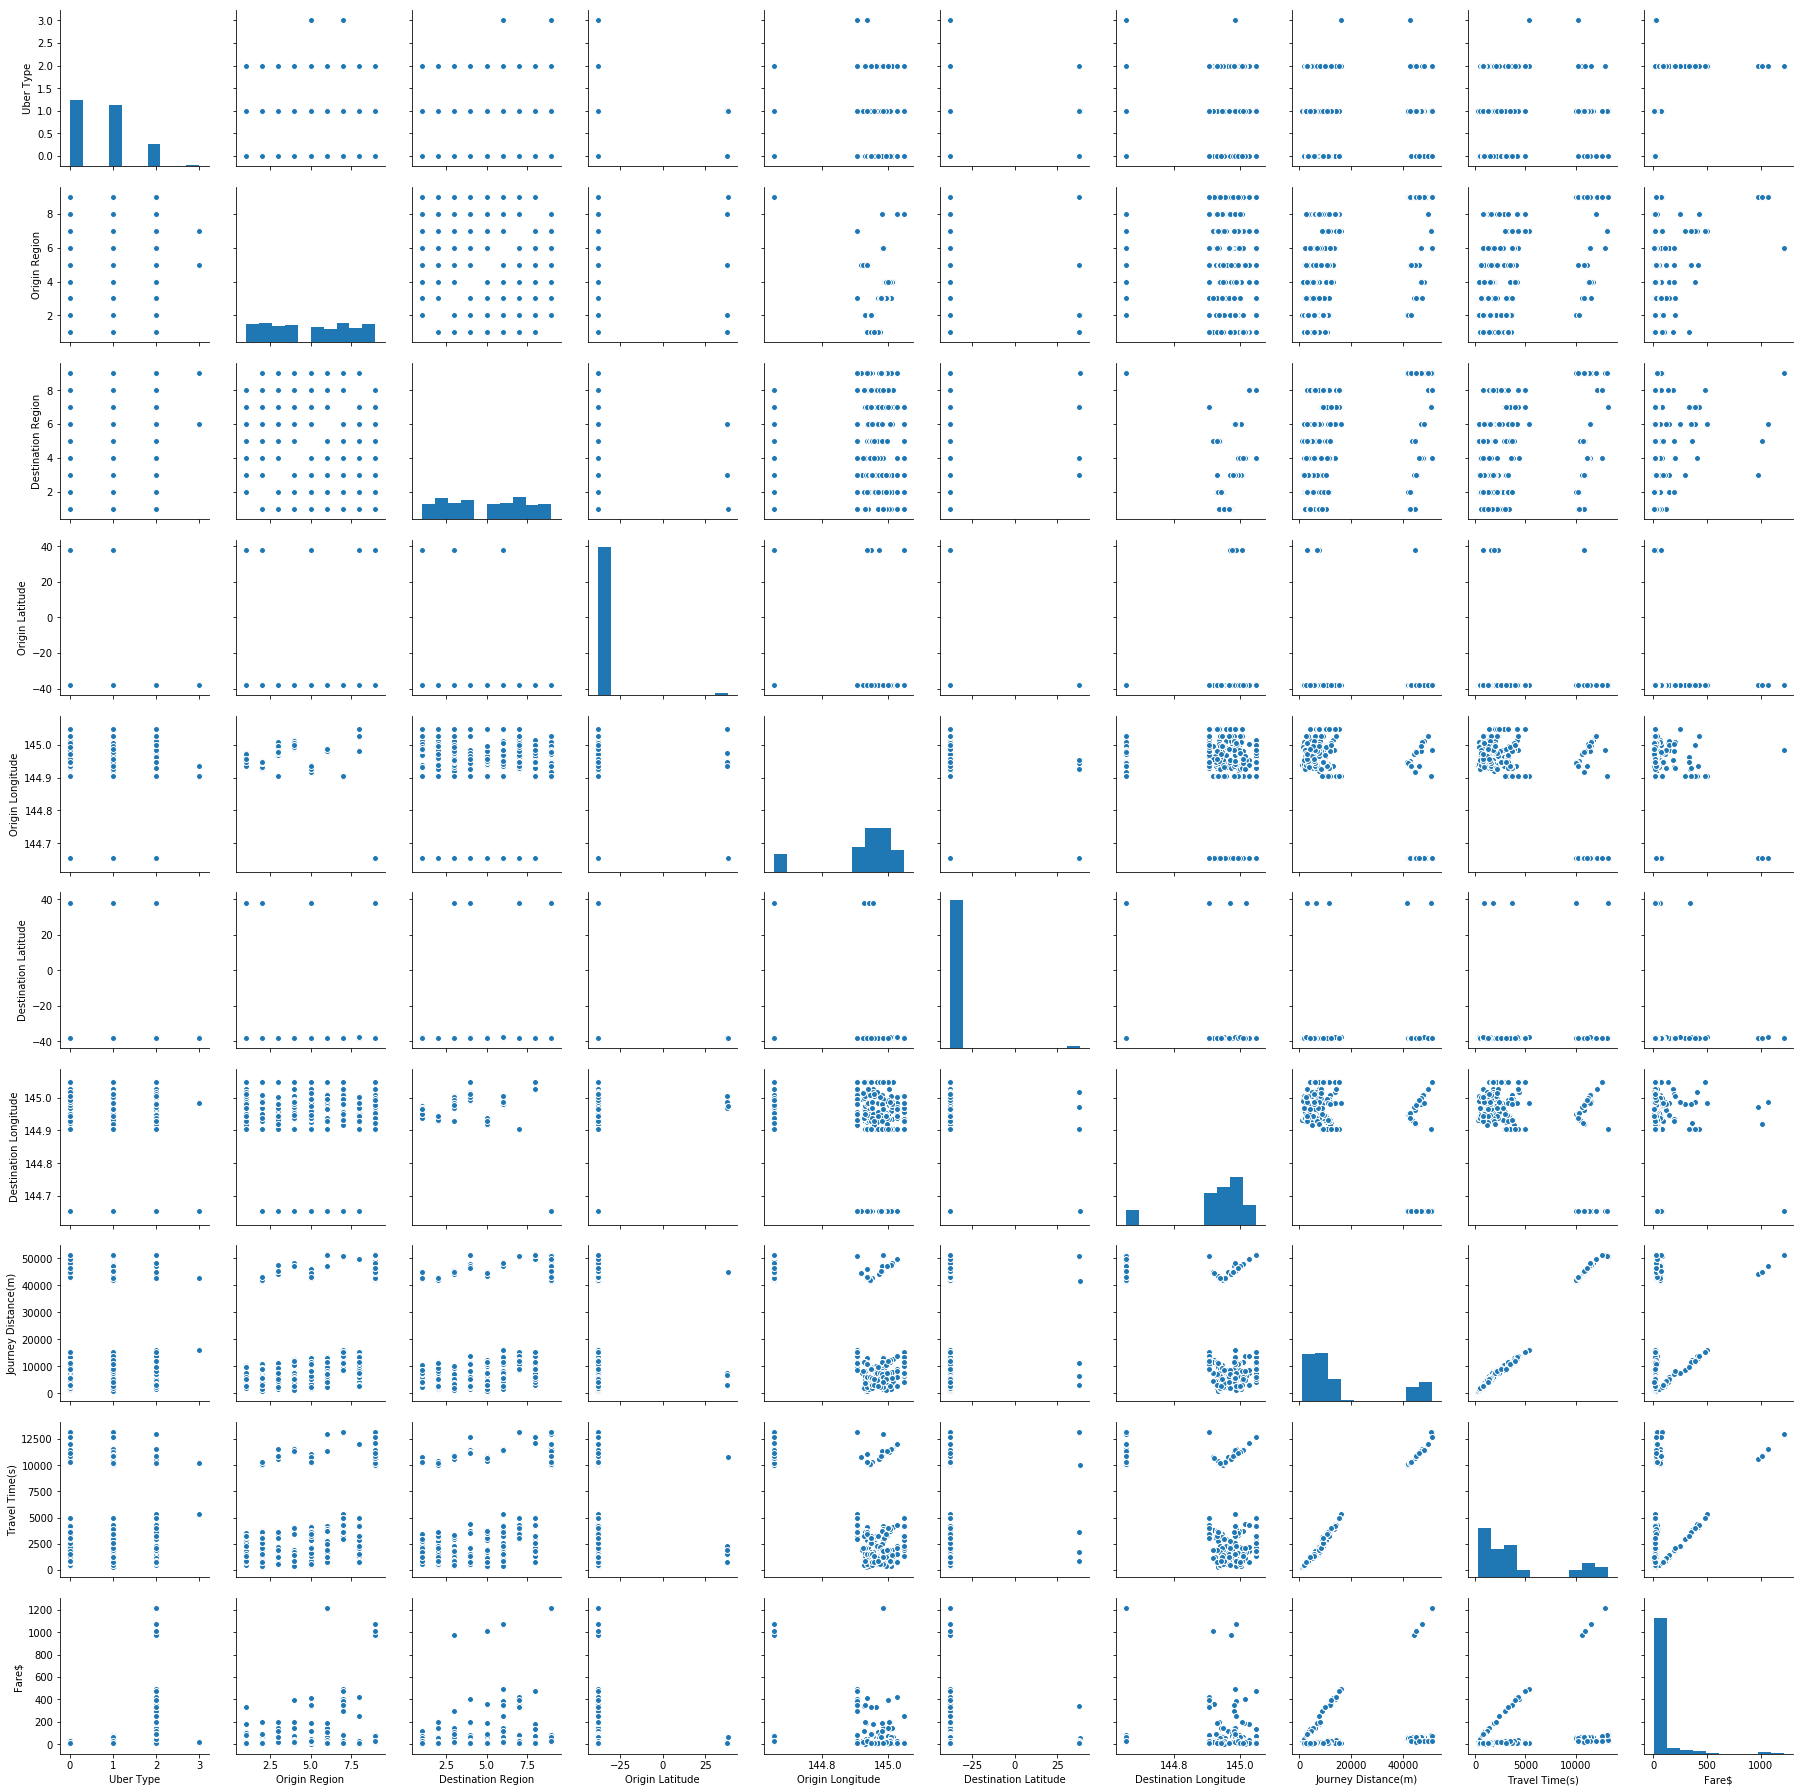

In [9]:
sns.pairplot(dirty_new)

It is already clearly stated that there are three type of uber type (Uber pool, Uberx, Uber black) which are represented through numerical values, but there are 4 (**Issue Identified**) in the pair plot which is not correct. 

Now in order to determine the correct mapping of uber type to identifier, we will check the outlier file as it is already stated that there is no issue with Uber type

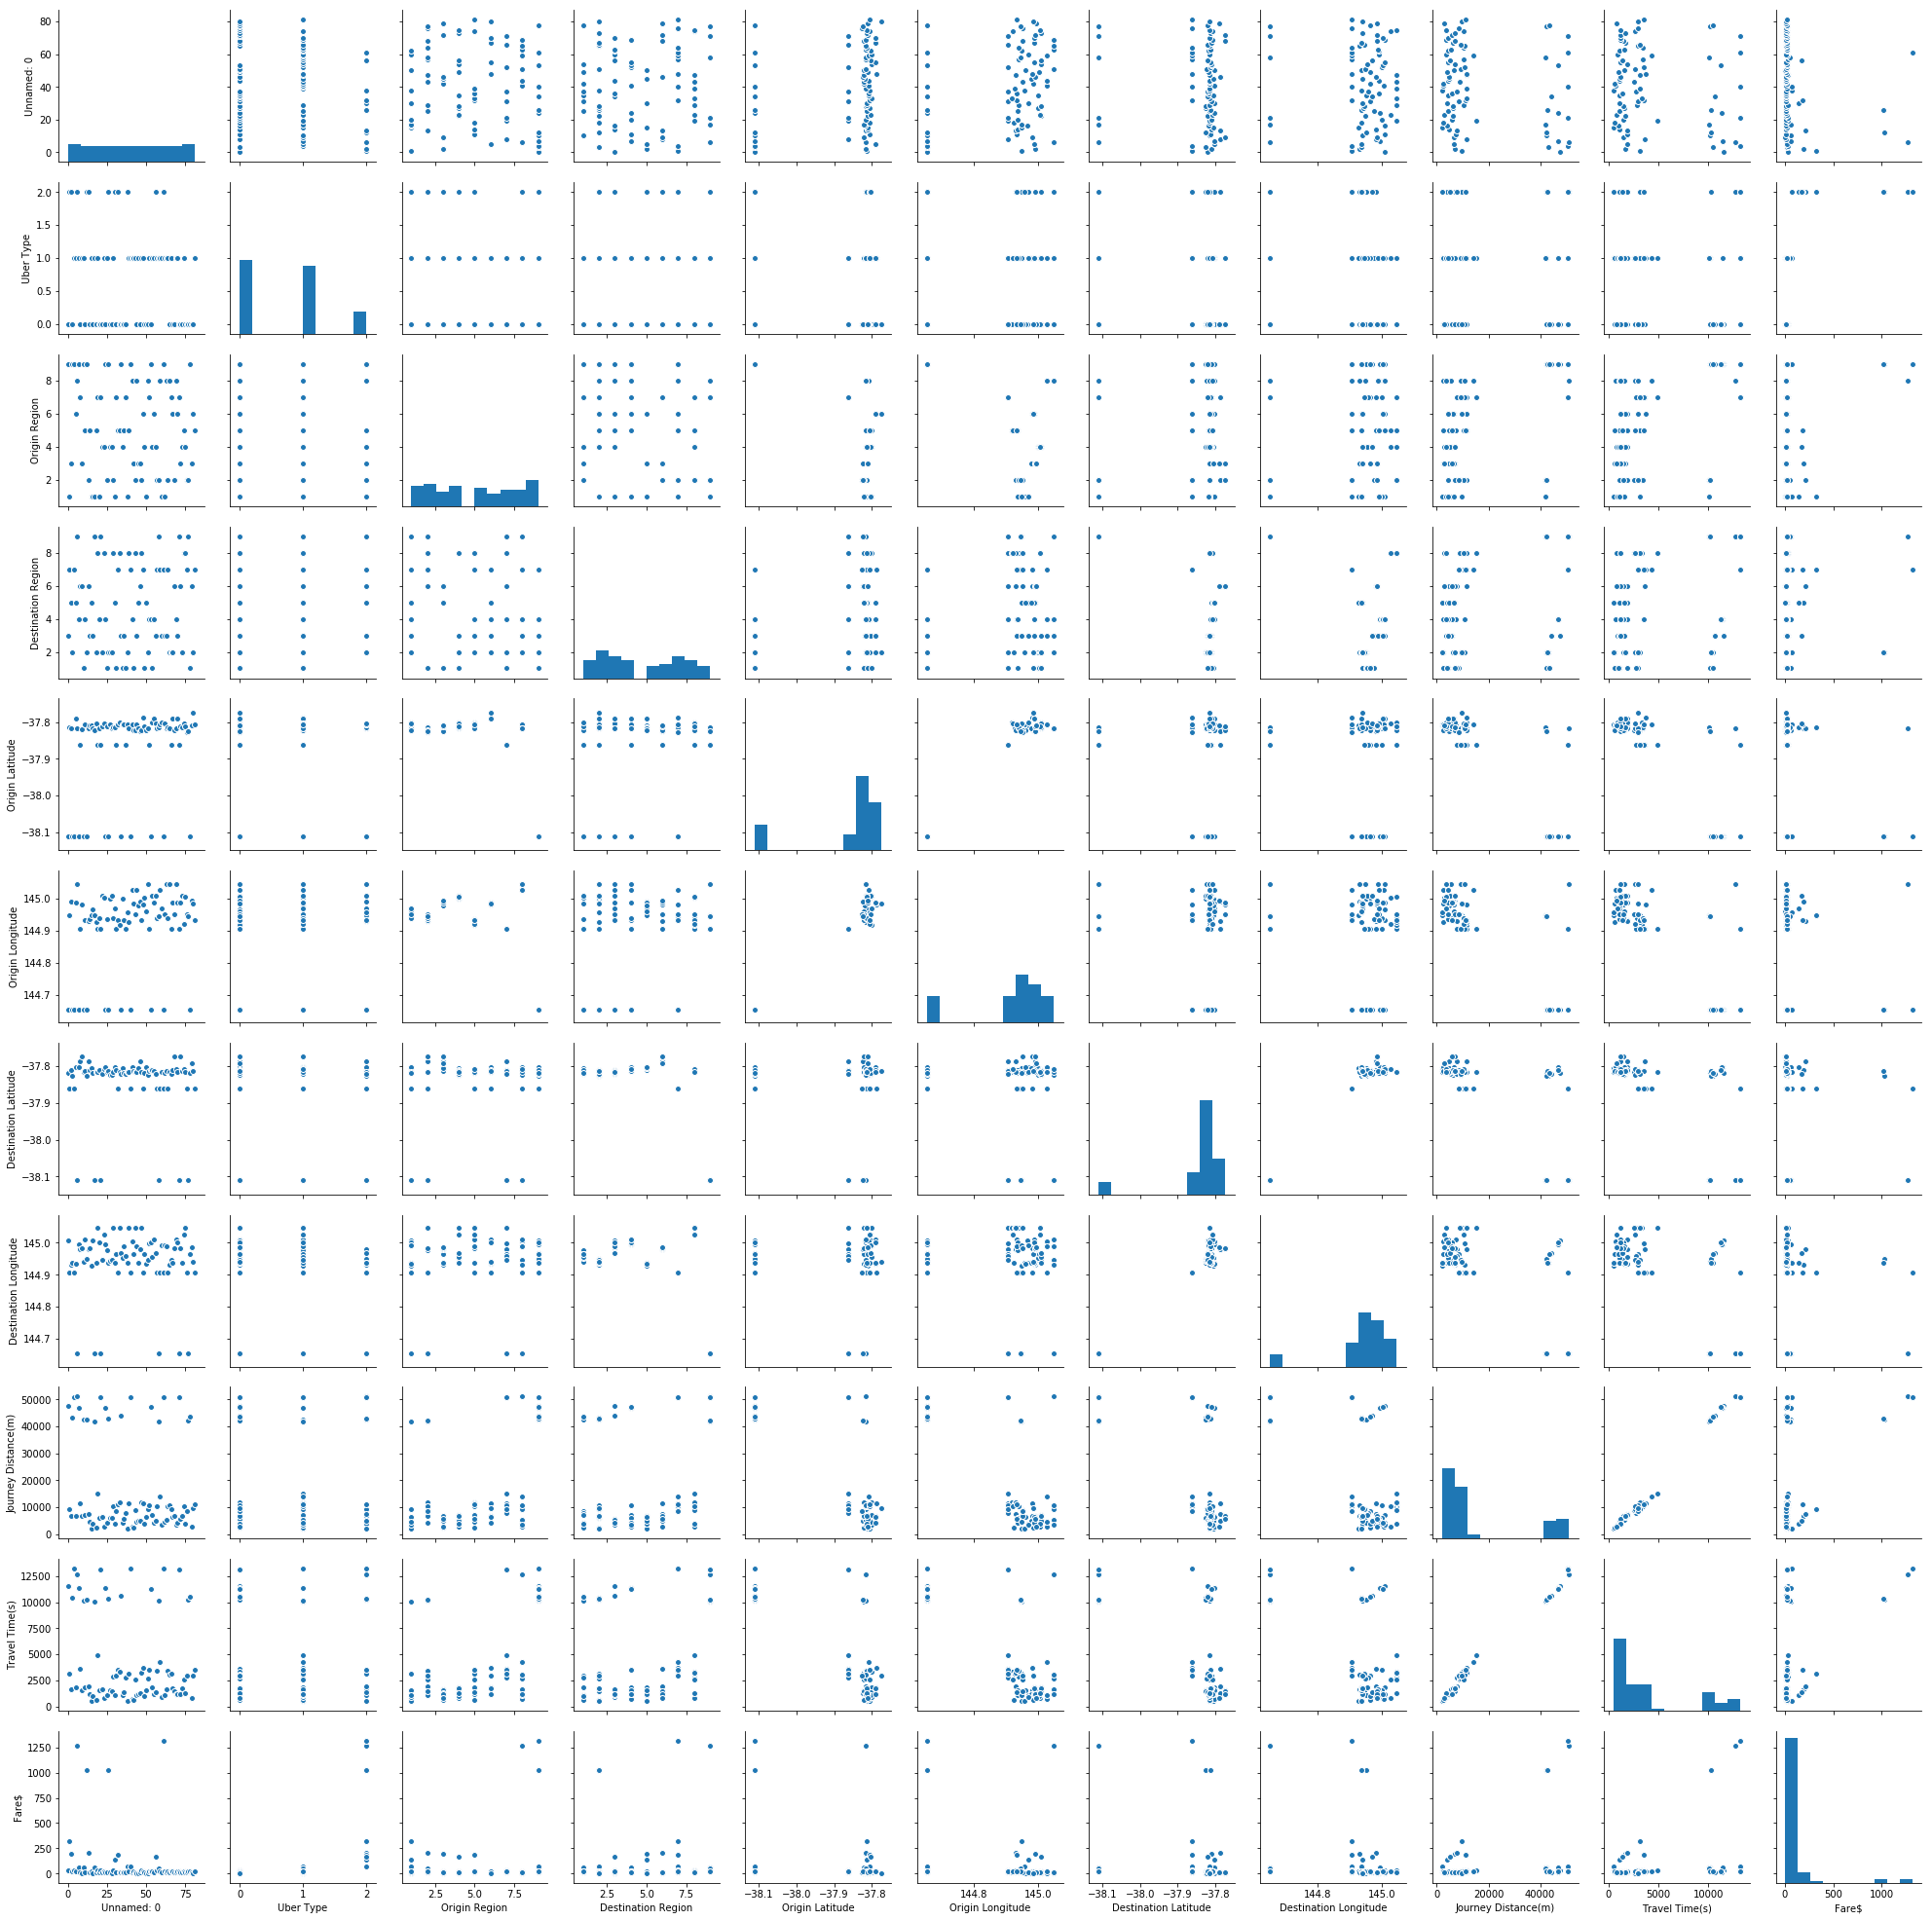

In [10]:
sns.pairplot(outliers)

###### 4.1 Fixing Uber Type

In [11]:
#Directly map the uber type on the basis of ID
def check_type(ids,types):
    if int(ids[2])==5:
        return 2
    if int(ids[2])==3:
        return 1
    if int(ids[2])==1:
        return 0
        

dirty_new["Uber Type"]= dirty_new.apply(lambda x: check_type(x['Unnamed: 0'], x['Uber Type'] ),axis=1)

#Reference: Soma, J. (2016). Retrieved from http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/

dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,3,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13174.9,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10413.9,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49779.1,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13569.7,2018-03-26,07:52:01,4192.26,9:01:53,11.32
7,ID5130209213,2,1,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.66,19:35:21,13.62


We can determine that there is direct corelation between third element of identifier and the Uber type, hence we will fix it

###### 4.2 Fixing Origin Latitude

In [12]:
dirty_new.loc[dirty_new['Origin Latitude']>0,'Origin Latitude']= -dirty_new.loc[dirty_new['Origin Latitude']>0,'Origin Latitude']
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,3,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13174.9,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10413.9,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49779.1,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13569.7,2018-03-26,07:52:01,4192.26,9:01:53,11.32
7,ID5130209213,2,1,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.66,19:35:21,13.62


After plotting different longitude and latitude we will find some points near Japan and can be corrected by changing the Latitude 

###### 4.3 Fixing Destination Latitude

In [13]:
dirty_new.loc[dirty_new['Destination Latitude']>0,'Destination Latitude']= -dirty_new.loc[dirty_new['Destination Latitude']>0,'Destination Latitude']
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,3,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13174.9,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10413.9,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49779.1,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13569.7,2018-03-26,07:52:01,4192.26,9:01:53,11.32
7,ID5130209213,2,1,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.66,19:35:21,13.62


After plotting different longitude and latitude we will find some points near Japan and can be corrected by changing the Latitude 

###### 4.4 Fixing Origin & Destination Region

After plotting all the latitude and longitude with Origin Region and Destination Region in Tableau ( or any other visualisation tool) we can clearly see some overlapping of regions. In order to fix such overlapping of regions, I have developed KNN model by training it through missing and outlier dataset.
Also evident from the below graph

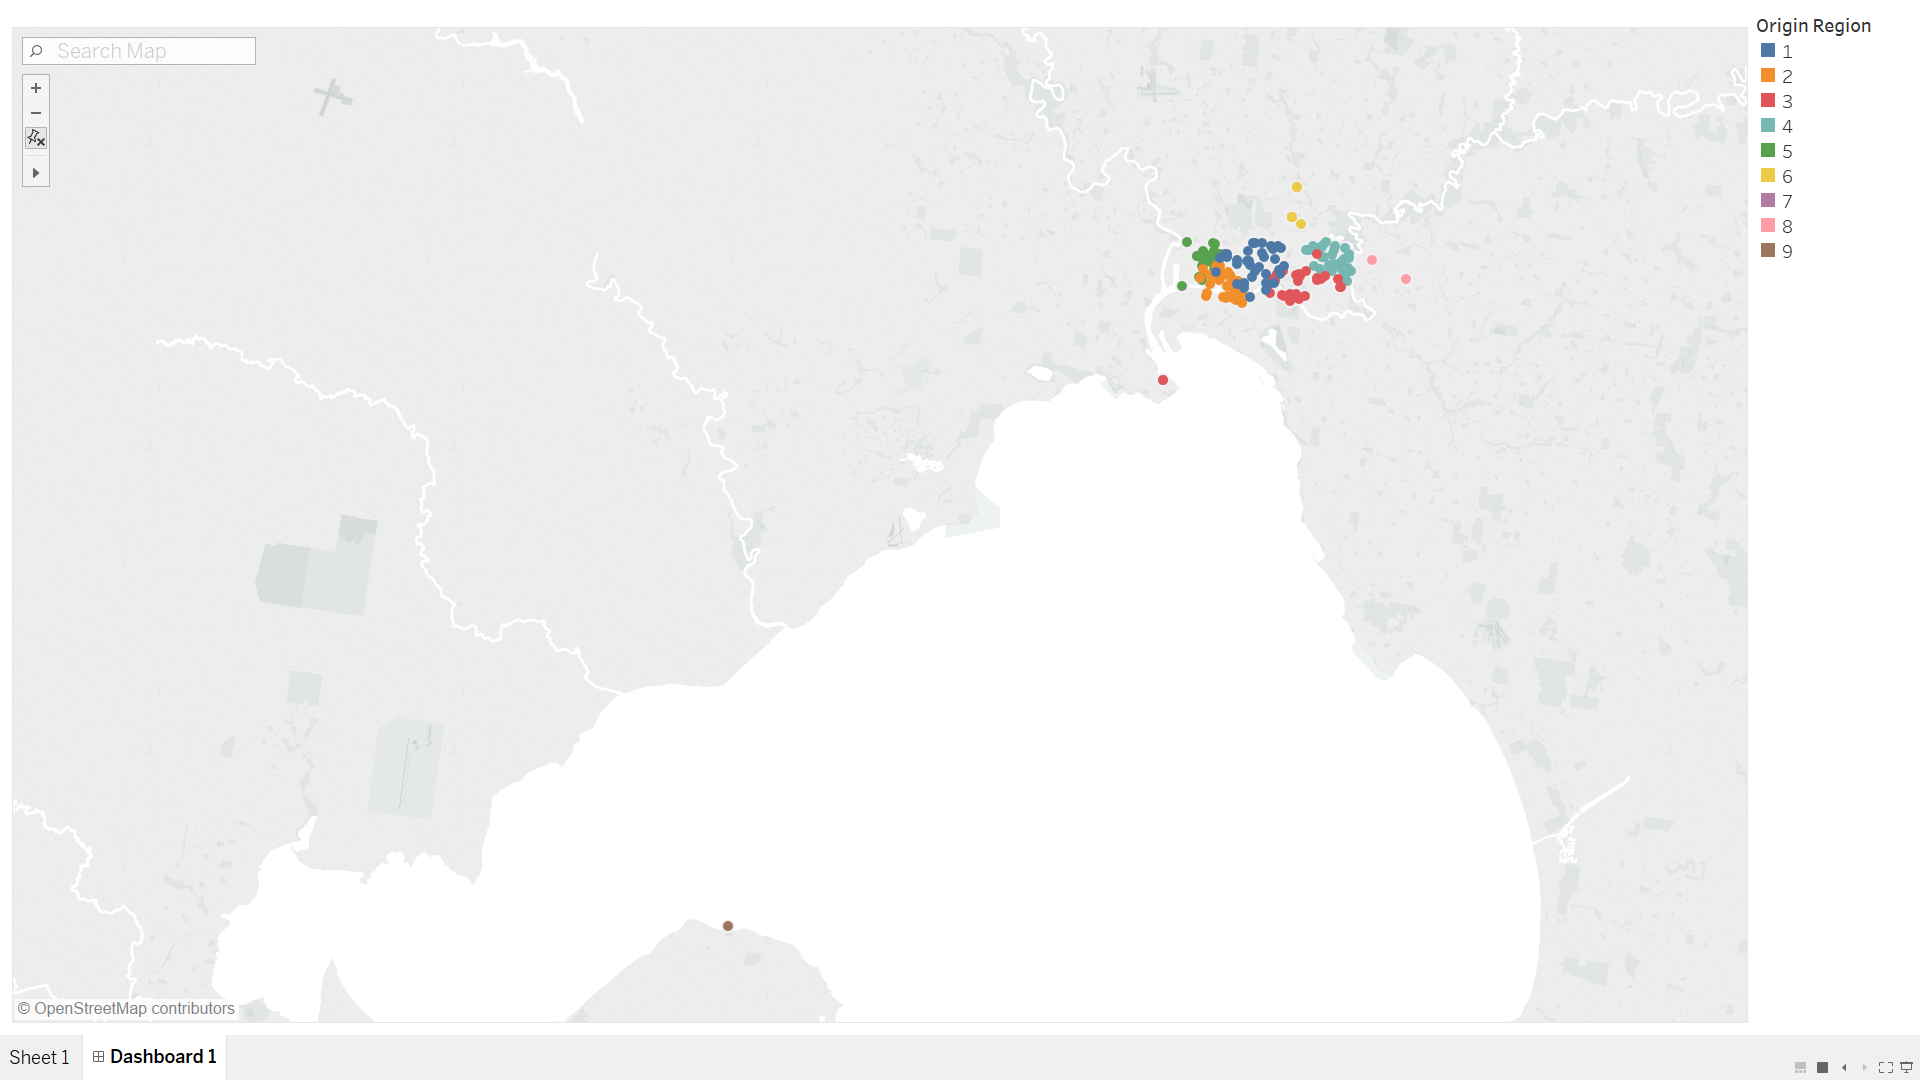

In [14]:
#creating a training dataset through missing and outliers file
a= missing[['Origin Latitude','Origin Longitude', 'Origin Region']]
b= outliers[['Origin Latitude','Origin Longitude','Origin Region']]

a.rename(columns={'Origin Latitude':'Latitude',
                          'Origin Longitude':'Longitude',
                          'Origin Region':'Region'}, 
                 inplace=True)
b.rename(columns={'Origin Latitude':'Latitude',
                          'Origin Longitude':'Longitude',
                          'Origin Region':'Region'}, 
                 inplace=True)

d= missing[['Destination Latitude','Destination Longitude', 'Destination Region']]
e= outliers[['Destination Latitude','Destination Longitude','Destination Region']]
d.rename(columns={'Destination Latitude':'Latitude',
                          'Destination Longitude':'Longitude',
                          'Destination Region':'Region'}, 
                 inplace=True)
e.rename(columns={'Destination Latitude':'Latitude',
                          'Destination Longitude':'Longitude',
                          'Destination Region':'Region'}, 
                 inplace=True)
# b.shape
c= pd.concat([a,b,d,e], axis=0)
c.shape

C:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(368, 3)

In [15]:
#### Fitting the model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(c[['Latitude','Longitude']],c['Region'])
# c is combination of  both origin and destination, Longitude, Latitude & Region of outliers and missing file

#### Predicition 
dirty_new['Origin Region']=knn.predict(dirty_new[['Origin Latitude','Origin Longitude']])
dirty_new['Destination Region']=knn.predict(dirty_new[['Destination Latitude','Destination Longitude']])
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13174.9,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10413.9,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49779.1,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13569.7,2018-03-26,07:52:01,4192.26,9:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.66,19:35:21,13.62


Below is the graph after fitting and predicting the values of the region from the model.

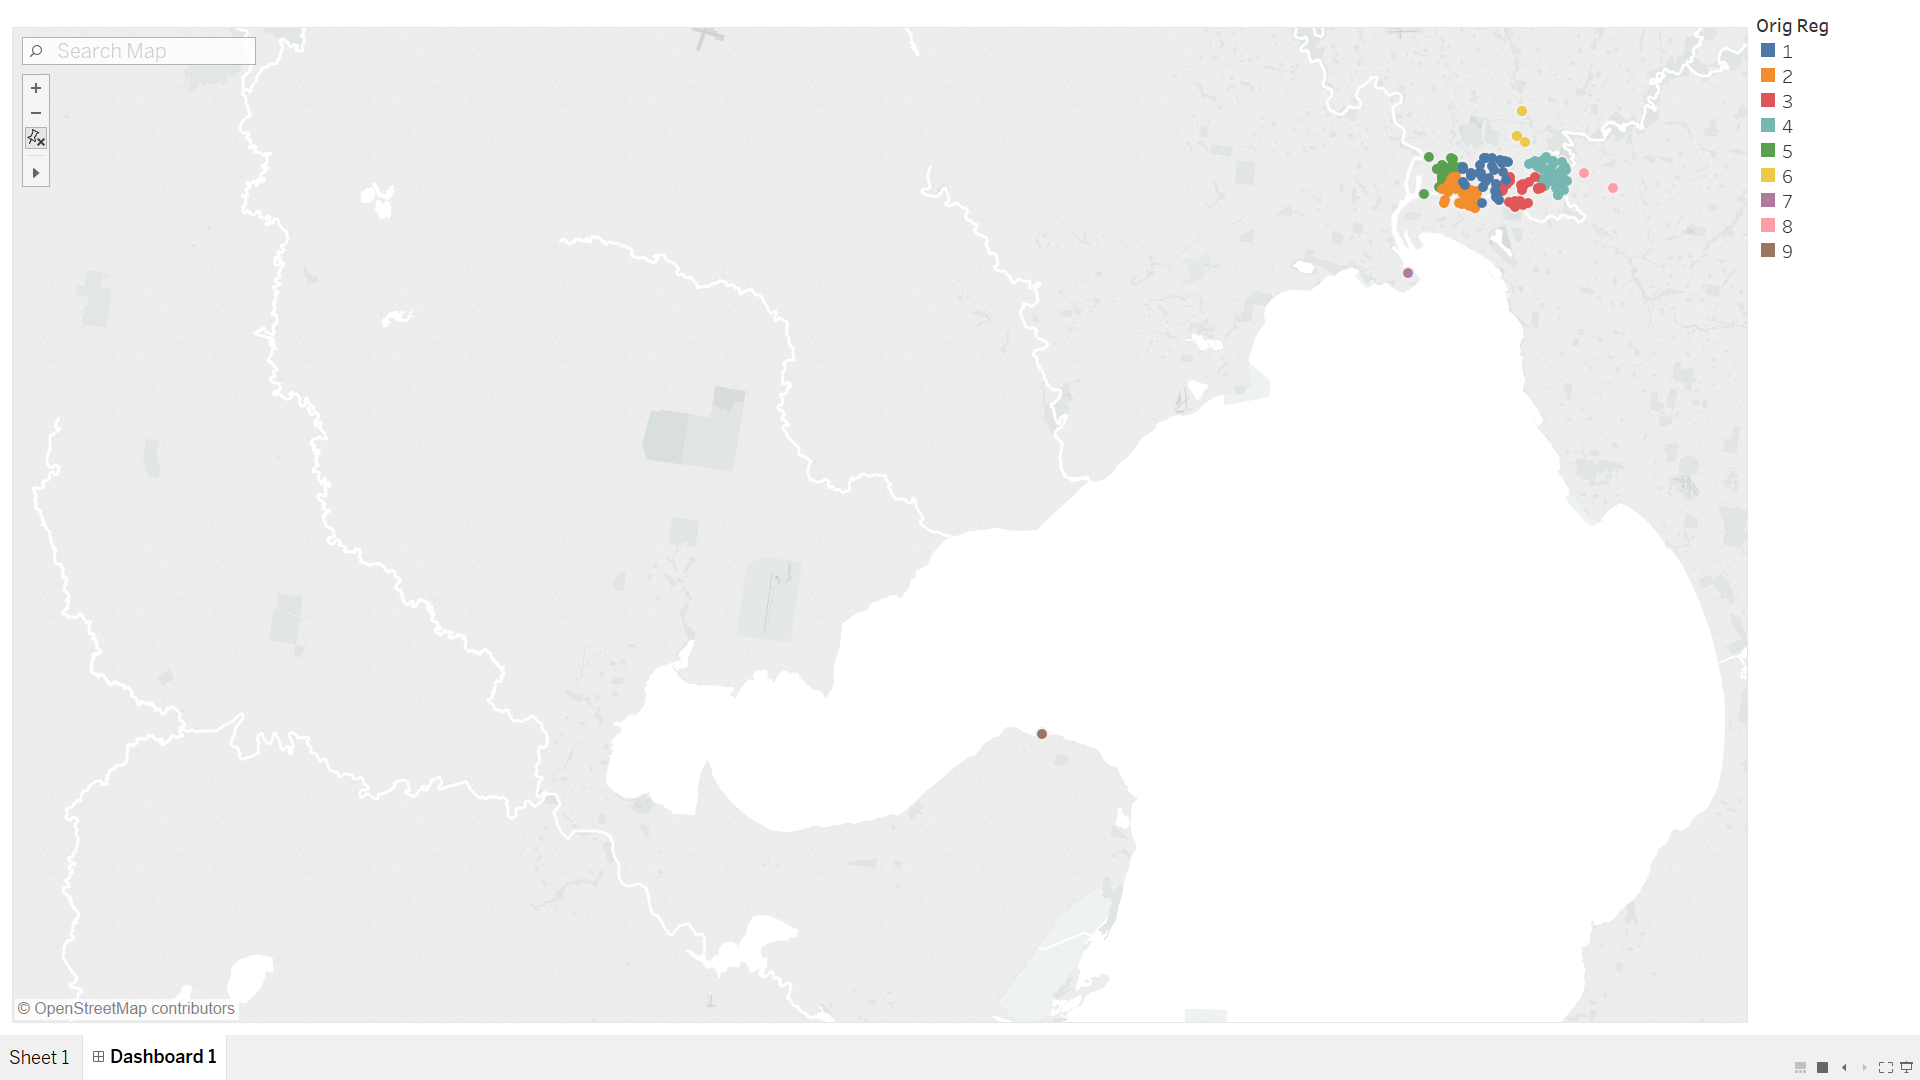

###### 4.5 Fixing Departure Date

After exploring the dataset, we have identified that there were some syntactic and semantic errors which are fixed below.

In [16]:
def date_fix(date):
    d= date.split('-')
    year=int(d[0])
    month=int(d[1])
    date=int(d[2])
    if month>12:
        date,month=month,date
    if month in (4,6,9,11):
        if date >30:
            date = 30
    if month ==2:
        if date>28:
            date =28
    
    dd = pd.to_datetime(str(year)+"-"+str(month)+"-"+str(date),format='%Y-%m-%d')
    return dd

dirty_new['Departure Date']=dirty_new['Departure Date'].apply(date_fix)
dirty_new



,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13174.9,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10413.9,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49779.1,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13569.7,2018-03-26,07:52:01,4192.26,9:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.66,19:35:21,13.62


###### 4.6 Fixing Journey Distance 

I have used Dijkstra Algorithm to identify and fix the journey distance by calculating the shortest distance through latitude and longitude. 

In [17]:
G = nx.from_pandas_edgelist(edge, 'u', 'v', ['distance(m)'])
# Declaring the Graph from edge list file


In [18]:
def calc_dist(o_la,o_lo,d_la,d_lo):
    u = int(node[(node['lat']==o_la) & (node['lon']==o_lo)] ['Unnamed: 0'])
    v= int(node[(node['lat']==d_la) & (node['lon']==d_lo)] ['Unnamed: 0'])
    #Shortest Path
    d, p= nx.single_source_dijkstra(G,source=u, target=v,weight='distance(m)')
    return(d)


dirty_new["Journey Distance(m)"]= dirty_new.apply(lambda x: calc_dist(x['Origin Latitude'], x['Origin Longitude'],x['Destination Latitude'], x['Destination Longitude'] ),axis=1)
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,9:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.66,19:35:21,13.62


###### 4.7 Fixing Travel  Time

Just like Journey Distance, we will use the function provided below to calculate the time travelled with the help of nodes and and edges file.

In [19]:
edges=edge.copy()
# edges

# using below function to calculate total time on the basis of path
def traveltime(path):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt


def calc_time(o_la,o_lo,d_la,d_lo):
    u = int(node[(node['lat']==o_la) & (node['lon']==o_lo)] ['Unnamed: 0'])
    v= int(node[(node['lat']==d_la) & (node['lon']==d_lo)] ['Unnamed: 0'])
    #Shortest Path
    d, p= nx.single_source_dijkstra(G,source=u, target=v,weight='distance(m)')
    #clculating the path and passing the path to calculate the distance
    tt= traveltime(p)
    return(round(float(tt),2))

    

dirty_new["Travel Time(s)"]= dirty_new.apply(lambda x: calc_time(x['Origin Latitude'], x['Origin Longitude'],x['Destination Latitude'], x['Destination Longitude'] ),axis=1)
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,6:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,8:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,4:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,9:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.36,19:35:21,13.62


###### 4.8 Fixing Departure and Arrival Time

Now that we are sure of our Journey Distance and Travel time, We will be fixing issues with Departure time and Arrival time

>4.8.1. Interchanged Arrival time and Departure Time

In [20]:
#  Converting them to time format
dirty_new['Arrival Time'] = pd.to_timedelta(dirty_new['Arrival Time'])
dirty_new['Departure Time'] = pd.to_timedelta(dirty_new['Departure Time'])

In [21]:
dirty_new[(dirty_new['Departure Time']+dirty_new['Travel Time(s)'].astype('timedelta64[s]')!=dirty_new['Arrival Time'])&(dirty_new['Arrival Time']+dirty_new['Travel Time(s)'].astype('timedelta64[s]')==dirty_new['Departure Time'])]

#9 rows having Arrival time and departure time swapped

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
139,ID1815359830,0,6,5,-37.787442,144.980409,-37.804201,144.927966,6629.0,2018-05-10,23:17:25,1828.62,22:46:57,14.97
140,ID1120319255,0,8,5,-37.815834,145.046450,-37.802525,144.927087,10786.0,2018-06-15,03:04:45,3053.88,02:13:52,17.55
141,ID1630814773,0,1,7,-37.800838,144.972446,-37.861835,144.905716,10036.0,2018-04-18,19:56:59,3306.18,19:01:53,15.48
144,ID1461447820,0,9,4,-38.110916,144.654173,-37.813991,145.007279,47743.0,2018-01-13,04:32:00,11419.32,01:21:41,35.24
149,ID5561048249,2,5,2,-37.806713,144.932650,-37.813352,144.938444,1682.0,2018-03-07,07:45:02,420.06,07:38:02,50.75
150,ID1761422718,0,6,4,-37.773845,144.983689,-37.804138,145.002140,6410.0,2018-04-11,15:04:13,1387.68,14:41:06,10.18
153,ID1784517371,0,4,1,-37.803539,144.994473,-37.803843,144.953374,4083.0,2018-01-22,05:57:55,1007.82,05:41:08,14.95
157,ID3344474614,1,5,2,-37.804305,144.942004,-37.825471,144.929081,7544.0,2018-05-10,15:04:56,1822.74,14:34:34,18.44
158,ID3879796832,1,9,2,-38.110916,144.654173,-37.818848,144.953388,42451.0,2018-02-05,09:47:23,10220.88,06:57:03,52.40


In [22]:
#Interchanging the Arrival time and Departure time where they are swapped
dirty_new['Arrival Time'],dirty_new['Departure Time'] = np.where (((dirty_new['Departure Time']+dirty_new['Travel Time(s)'].astype('timedelta64[s]')!=dirty_new['Arrival Time'])&(dirty_new['Arrival Time']+dirty_new['Travel Time(s)'].astype('timedelta64[s]')==dirty_new['Departure Time'])),[dirty_new['Departure Time'],dirty_new['Arrival Time']],[dirty_new['Arrival Time'],dirty_new['Departure Time']])
dirty_new
#Zero. (2017, Aug 4). Retrieved from Stack Overflow: https://stackoverflow.com/questions/45504391/swapping-column-values-based-on-column-conditions-pandas-dataframe

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,06:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,08:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,04:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,09:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.36,19:35:21,13.62


>4.8.2 Dates where Arrival time and Travel time are interchanged and also have error in difference of their time

In [23]:
# Identifying such cases
    
dirty_new[dirty_new['Arrival Time']-dirty_new['Departure Time']>pd.Timedelta(hours=20)]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
163,ID5884219164,2,5,4,-37.807954,144.933673,-37.812523,145.010322,7203.0,2018-07-11,00:27:33,1779.0,23:57:54,190.42


In [24]:
#Fixing Such cases
dirty_new['Arrival Time'],dirty_new['Departure Time'] = np.where ((dirty_new['Arrival Time']-dirty_new['Departure Time']>pd.Timedelta(hours=20)),[dirty_new['Departure Time'],dirty_new['Arrival Time']],[dirty_new['Arrival Time'],dirty_new['Departure Time']])
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,06:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,08:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,04:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,09:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.36,19:35:21,13.62


>4.8.3 Wrrong Arrival Time

Now we will identify cases where departure time and Travel time does not sum up to Arrival time. I have made the assumption that Departure time is corect and only Arrival time needs to be corrected.

In [25]:
# Creating a new column which will store the sum of departure time and Travel time
dirty_new['Dummy arrival']= pd.to_timedelta(dirty_new['Departure Time']+dirty_new['Travel Time(s)'].astype('timedelta64[s]'))
dirty_new['Dummy arrival']=pd.to_timedelta(dirty_new['Dummy arrival'])


In [26]:
# Dropping the Dummy arrival cilumn and fixing the index
dirty_new = dirty_new.drop(columns="Dummy arrival")
# dirty_new = dirty_new.astype(str) 
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,06:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,08:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,04:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,09:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.36,19:35:21,13.62


In [27]:
#Fixing the format of the new column
def fix_ti(t):
    t= str(t)
    t=t[7:15]
    return (t)


dirty_new['Arrival Time']= dirty_new['Arrival Time'].astype(str).apply(fix_ti)
dirty_new['Departure Time']= dirty_new['Departure Time'].astype(str).apply(fix_ti)
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,06:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,08:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,04:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,09:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.36,19:35:21,13.62


After fixing all the issues, I have written the entire data back to the csv file as per requested format

In [28]:
dirty= dirty_new.copy()
dirty_new.set_index('Unnamed: 0',inplace=True)
dirty_new.index.names=['']
dirty_new.to_csv('29858186_dirty_data_solution.csv')
dirty_new=dirty.copy()
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,06:13:56,198.42
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,08:57:19,24.10
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,04:48:35,14.63
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,09:01:53,11.32
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.36,19:35:21,13.62


## 5. Fixing Missing values

Before working on missing file, we will explore the file and see how many recods are present how many columns have missing values etc. 

In [29]:
missing.shape
# 102 rows and 14 columns

(102, 14)

In [30]:
missing.info()
# Values are missing in Uber Type and Fare columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
Unnamed: 0               102 non-null object
Uber Type                82 non-null float64
Origin Region            102 non-null int64
Destination Region       102 non-null int64
Origin Latitude          102 non-null float64
Origin Longitude         102 non-null float64
Destination Latitude     102 non-null float64
Destination Longitude    102 non-null float64
Journey Distance(m)      102 non-null float64
Departure Date           102 non-null object
Departure Time           102 non-null object
Travel Time(s)           102 non-null float64
Arrival Time             102 non-null object
Fare$                    84 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 11.2+ KB


In [31]:
missing.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,82.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,84.000000
mean,0.804878,4.813725,5.401961,-37.855430,144.922588,-37.855063,144.927426,17919.294118,4670.330000,110.166667
std,0.760751,2.680071,2.522217,0.104260,0.113232,0.101039,0.112685,17489.370851,4191.807913,235.243298
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,379.000000,88.200000,2.330000
25%,0.000000,3.000000,3.000000,-37.826141,144.920537,-37.861835,144.905716,5736.500000,1462.170000,14.282500
50%,1.000000,5.000000,6.000000,-37.815110,144.957614,-37.815834,144.955301,9452.000000,3053.310000,22.470000
75%,1.000000,7.000000,7.000000,-37.807030,144.984738,-37.805659,144.989114,42216.250000,10117.845000,69.065000
max,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51032.000000,13204.980000,1099.670000


Below is the first 5 rows of missing data set

In [32]:
missing.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3508455764,1.0,5,6,-37.801155,144.918667,-37.773845,144.983689,8134.0,2018-01-04,19:32:21,1871.64,20:03:32,19.46
1,ID1849515263,0.0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-04-04,22:02:07,11355.66,1:11:22,22.64
2,ID5400045312,2.0,8,5,-37.815834,145.046450,-37.802420,144.934978,10567.0,2018-06-18,11:19:04,2965.14,12:08:29,262.40
3,ID1672983032,NaN,3,8,-37.811146,144.978516,-37.815834,145.046450,6193.0,2018-02-24,11:31:23,1822.32,12:01:45,8.45
4,ID1503368443,NaN,2,9,-37.815095,144.941201,-38.110916,144.654173,42220.0,2018-02-05,12:40:11,10119.42,15:28:50,17.23


###### 5.1 Fixing Uber Type

As we have already seen that Uber type is directly proportional to 3rd value of the ID we will reuse the earlier function to identify the missing Uber type

In [33]:
def check_type(ids,types):
    if int(ids[2])==5:
        return 2
    if int(ids[2])==3:
        return 1
    if int(ids[2])==1:
        return 0
        

missing["Uber Type"]= missing.apply(lambda x: check_type(x['Unnamed: 0'], x['Uber Type'] ),axis=1)
missing
#Soma, J. (2016). Retrieved from http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3508455764,1,5,6,-37.801155,144.918667,-37.773845,144.983689,8134.0,2018-01-04,19:32:21,1871.64,20:03:32,19.46
1,ID1849515263,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-04-04,22:02:07,11355.66,1:11:22,22.64
2,ID5400045312,2,8,5,-37.815834,145.046450,-37.802420,144.934978,10567.0,2018-06-18,11:19:04,2965.14,12:08:29,262.40
3,ID1672983032,0,3,8,-37.811146,144.978516,-37.815834,145.046450,6193.0,2018-02-24,11:31:23,1822.32,12:01:45,8.45
4,ID1503368443,0,2,9,-37.815095,144.941201,-38.110916,144.654173,42220.0,2018-02-05,12:40:11,10119.42,15:28:50,17.23
5,ID5119479640,2,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-02-23,15:05:20,5320.68,16:34:00,468.44
6,ID1164242843,0,2,3,-37.814824,144.937649,-37.813183,144.973911,3812.0,2018-07-11,15:01:32,957.48,15:17:29,9.27
7,ID1511092255,0,6,5,-37.773845,144.983689,-37.809116,144.931933,7455.0,2018-04-10,06:47:44,1618.32,7:14:42,2.33
8,ID1151369117,0,1,9,-37.820854,144.954921,-38.110916,144.654173,42648.0,2018-05-06,03:47:58,10241.52,6:38:39,25.49
9,ID3778629567,1,5,4,-37.816432,144.928439,-37.805456,144.997162,7520.0,2018-05-20,08:52:22,1953.96,9:24:55,18.74


###### 5.2 Fixing Fare

To Predict Fare, we will be using Linear regression model to predict the values. 
But before doing that we will create some new features to be part of predictors to represent date and time.
We will be using missing and and dirty data set to train the model.

1. Is_weekend: feature to indicate if the the particular date is weekend or not.

In [34]:
#checking on dirty_new dataset as, it will be used to train the model
def check_weekend (date):
    weekno = date.weekday()
    if weekno<5:
        return 0
    else:
        return 1


dirty_new['Is_weekend']= dirty_new['Departure Date'].apply(check_weekend)

#Fahad. (2015, April 1). Retrieved from Stackoverflow: https://stackoverflow.com/questions/29384696/how-to-find-current-day-is-weekday-or-weekends-in-python
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,06:13:56,198.42,0
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99,0
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,08:57:19,24.10,0
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52,0
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,04:48:35,14.63,0
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65,0
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,09:01:53,11.32,0
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67,0
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93,0
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.36,19:35:21,13.62,1


In [35]:
#Checking on the missing data set
def check_weekend (date):
    weekno = pd.to_datetime(date).weekday()
    if weekno<5:
        return 0
    else:
        return 1


missing['Is_weekend']= missing['Departure Date'].apply(check_weekend)
missing
#Fahad. (2015, April 1). Retrieved from Stackoverflow: https://stackoverflow.com/questions/29384696/how-to-find-current-day-is-weekday-or-weekends-in-python


,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend
0,ID3508455764,1,5,6,-37.801155,144.918667,-37.773845,144.983689,8134.0,2018-01-04,19:32:21,1871.64,20:03:32,19.46,0
1,ID1849515263,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-04-04,22:02:07,11355.66,1:11:22,22.64,0
2,ID5400045312,2,8,5,-37.815834,145.046450,-37.802420,144.934978,10567.0,2018-06-18,11:19:04,2965.14,12:08:29,262.40,0
3,ID1672983032,0,3,8,-37.811146,144.978516,-37.815834,145.046450,6193.0,2018-02-24,11:31:23,1822.32,12:01:45,8.45,1
4,ID1503368443,0,2,9,-37.815095,144.941201,-38.110916,144.654173,42220.0,2018-02-05,12:40:11,10119.42,15:28:50,17.23,0
5,ID5119479640,2,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-02-23,15:05:20,5320.68,16:34:00,468.44,0
6,ID1164242843,0,2,3,-37.814824,144.937649,-37.813183,144.973911,3812.0,2018-07-11,15:01:32,957.48,15:17:29,9.27,0
7,ID1511092255,0,6,5,-37.773845,144.983689,-37.809116,144.931933,7455.0,2018-04-10,06:47:44,1618.32,7:14:42,2.33,0
8,ID1151369117,0,1,9,-37.820854,144.954921,-38.110916,144.654173,42648.0,2018-05-06,03:47:58,10241.52,6:38:39,25.49,1
9,ID3778629567,1,5,4,-37.816432,144.928439,-37.805456,144.997162,7520.0,2018-05-20,08:52:22,1953.96,9:24:55,18.74,1


2. Creating indicator of time as fare is dependent on the time

In [36]:
# creating the time indicator for dirty dataset
def time_of_day(time):
    hr = time
#     print(hr)
#     hr = pd.to_datetime(time).dt.hour
    if hr <=11 and hr>=6:
        return 0
    if hr>=12 and hr<=20:
        return 1
    if hr>=21 or hr <=5:
        return 2
# dirty_new['Departure Time']

dirty_new ["time_of_the_day"]=pd.to_datetime(dirty_new["Departure Time"]).dt.hour.apply(time_of_day)
dirty_new

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend,time_of_the_day
0,ID5782725870,2,4,2,-37.815690,145.006882,-37.821497,144.935735,7032.0,2018-07-06,05:43:16,1840.26,06:13:56,198.42,0,2
1,ID3872742019,1,4,9,-37.811876,145.014925,-38.110916,144.654173,48263.0,2018-03-16,14:01:59,11702.70,17:17:01,65.99,0,1
2,ID3700699553,1,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-04-03,07:52:56,3863.58,08:57:19,24.10,0,0
3,ID1727448681,0,3,7,-37.815339,144.995136,-37.861835,144.905716,10407.0,2018-05-08,17:17:40,3316.62,18:12:56,15.52,0,1
4,ID1181621404,0,8,3,-37.807202,145.026637,-37.824721,144.982706,5855.0,2018-03-12,04:24:35,1440.66,04:48:35,14.63,0,2
5,ID1294883281,0,9,8,-38.110916,144.654173,-37.807202,145.026637,49777.0,2018-06-05,10:06:19,12099.66,13:27:58,25.65,0,0
6,ID1411110292,0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-03-26,07:52:01,4192.26,09:01:53,11.32,0,0
7,ID5130209213,2,2,8,-37.817458,144.952727,-37.807202,145.026637,7571.0,2018-04-04,13:39:29,1759.26,14:08:48,182.67,0,1
8,ID5339349329,2,4,2,-37.810919,144.997054,-37.821030,144.943017,5310.0,2018-06-04,22:04:49,1246.56,22:25:35,146.93,0,2
9,ID1361813463,0,2,3,-37.815494,144.938809,-37.813837,144.988740,5177.0,2018-06-16,19:13:27,1314.36,19:35:21,13.62,1,1


In [37]:
## creating the time indicator for dirty dataset
def time_of_day(time):
    hr = time

    if hr <=11 and hr>=6:
        return 0
    if hr>=12 and hr<=20:
        return 1
    if hr>=21 or hr <=5:
        return 2

missing ["time_of_the_day"]=pd.to_datetime(missing["Departure Time"]).dt.hour.apply(time_of_day)
missing

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend,time_of_the_day
0,ID3508455764,1,5,6,-37.801155,144.918667,-37.773845,144.983689,8134.0,2018-01-04,19:32:21,1871.64,20:03:32,19.46,0,1
1,ID1849515263,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-04-04,22:02:07,11355.66,1:11:22,22.64,0,2
2,ID5400045312,2,8,5,-37.815834,145.046450,-37.802420,144.934978,10567.0,2018-06-18,11:19:04,2965.14,12:08:29,262.40,0,0
3,ID1672983032,0,3,8,-37.811146,144.978516,-37.815834,145.046450,6193.0,2018-02-24,11:31:23,1822.32,12:01:45,8.45,1,0
4,ID1503368443,0,2,9,-37.815095,144.941201,-38.110916,144.654173,42220.0,2018-02-05,12:40:11,10119.42,15:28:50,17.23,0,1
5,ID5119479640,2,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-02-23,15:05:20,5320.68,16:34:00,468.44,0,1
6,ID1164242843,0,2,3,-37.814824,144.937649,-37.813183,144.973911,3812.0,2018-07-11,15:01:32,957.48,15:17:29,9.27,0,1
7,ID1511092255,0,6,5,-37.773845,144.983689,-37.809116,144.931933,7455.0,2018-04-10,06:47:44,1618.32,7:14:42,2.33,0,0
8,ID1151369117,0,1,9,-37.820854,144.954921,-38.110916,144.654173,42648.0,2018-05-06,03:47:58,10241.52,6:38:39,25.49,1,2
9,ID3778629567,1,5,4,-37.816432,144.928439,-37.805456,144.997162,7520.0,2018-05-20,08:52:22,1953.96,9:24:55,18.74,1,0


In [38]:
# Selecting the columns to generate model from
dirty_new_selected_column=dirty_new [["Unnamed: 0","Uber Type","Journey Distance(m)","Travel Time(s)","Is_weekend","time_of_the_day","Fare$"]] #310 rows
missing_selected_column=missing[["Unnamed: 0","Uber Type","Journey Distance(m)","Travel Time(s)","Is_weekend","time_of_the_day","Fare$"]]   #84 rows

Genearting the training data set by combining both the files

In [39]:
# Combining the two files and selecting data which is not null from missing data file
missing_perfect_selected_column= missing_selected_column[ -missing_selected_column["Fare$"].isna()]
missing_to_be_predicted= missing_selected_column[ missing_selected_column["Fare$"].isna()]
combined_train= pd.concat([dirty_new_selected_column,missing_perfect_selected_column], axis=0)
combined_train.shape


(394, 7)

Dividing the data set to generate 3 training data set which will be fed in the respective models 

In [40]:
combined_train_0=combined_train[combined_train["Uber Type"]==0]
combined_train_1=combined_train[combined_train["Uber Type"]==1]
combined_train_2=combined_train[combined_train["Uber Type"]==2]

Instantiating the linear regression model 

In [41]:

l0 = LinearRegression() #instatiate
l1 = LinearRegression() #instatiate
l2= LinearRegression() #instatiate

Splitting the data into predictor and target of training and testing data set to identify the accuracy of the model.

In [42]:
combined_type_0_X_train, combined_type_0_X_test, combined_type_0_y_train, combined_type_0_y_test = train_test_split(combined_train_0.iloc[:,2:-1],combined_train_0.iloc[:,-1:], random_state = 1)
combined_type_1_X_train, combined_type_1_X_test, combined_type_1_y_train, combined_type_1_y_test = train_test_split(combined_train_1.iloc[:,2:-1],combined_train_1.iloc[:,-1:], random_state = 1)
combined_type_2_X_train, combined_type_2_X_test, combined_type_2_y_train, combined_type_2_y_test = train_test_split(combined_train_2.iloc[:,2:-1],combined_train_2.iloc[:,-1:], random_state = 1)
map(pd.np.shape,[combined_type_0_X_train, combined_type_0_X_test, combined_type_0_y_train, combined_type_0_y_test])
map(pd.np.shape,[combined_type_1_X_train, combined_type_1_X_test, combined_type_1_y_train, combined_type_1_y_test])
map(pd.np.shape,[combined_type_2_X_train, combined_type_2_X_test, combined_type_2_y_train, combined_type_2_y_test])

Fitting the Training data set to the model

In [43]:
l0.fit(combined_type_0_X_train,combined_type_0_y_train) #fit
l1.fit(combined_type_1_X_train,combined_type_1_y_train) #fit
l2.fit(combined_type_2_X_train,combined_type_2_y_train) #fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Prediciting the target variable

In [44]:
combined_type_0_pred=l0.predict(combined_type_0_X_test)
combined_type_1_pred=l1.predict(combined_type_1_X_test)
combined_type_2_pred=l2.predict(combined_type_2_X_test)

Just so to be sure we will also plot the graph to of predicted values to see the linear fit of the graph

Text(0.5,1,'Linear Fit Graph for Uber type 0')

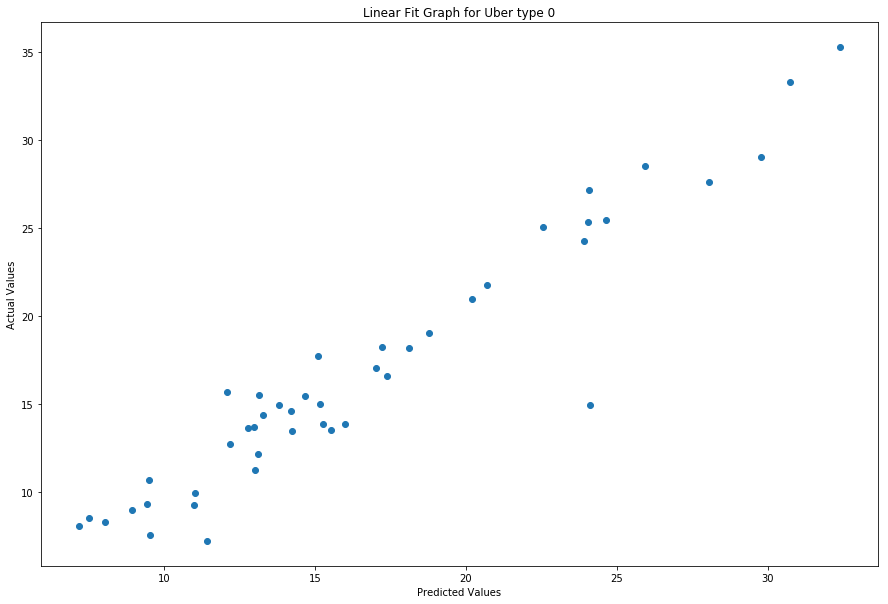

In [45]:
plt.rcParams['figure.figsize']=15,10

# combined_type_0_y_test
plt.scatter(combined_type_0_pred,combined_type_0_y_test['Fare$'])

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Fit Graph for Uber type 0')


Text(0.5,1,'Linear Fit Graph for Uber type 1')

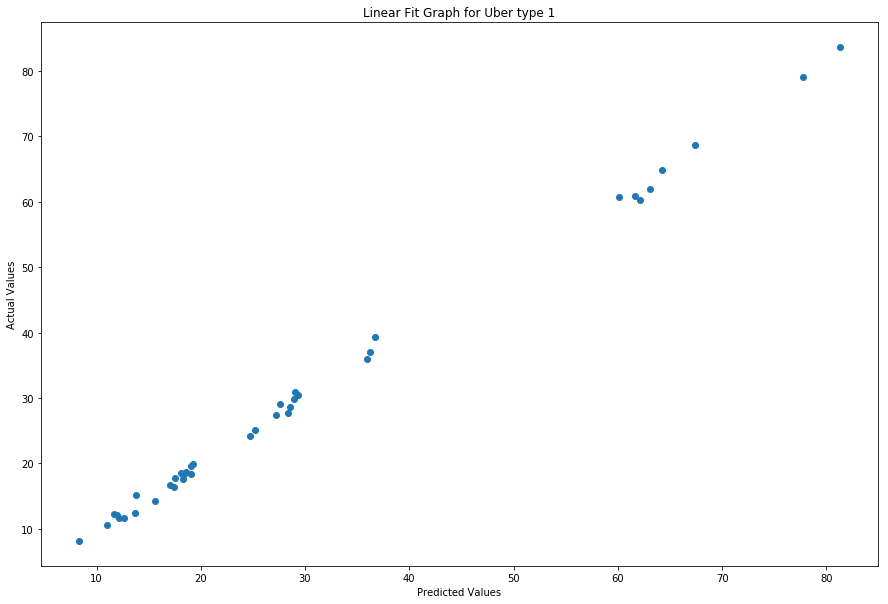

In [46]:

plt.scatter(combined_type_1_pred,combined_type_1_y_test['Fare$'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Fit Graph for Uber type 1')


Text(0.5,1,'Linear Fit Graph for Uber type 2')

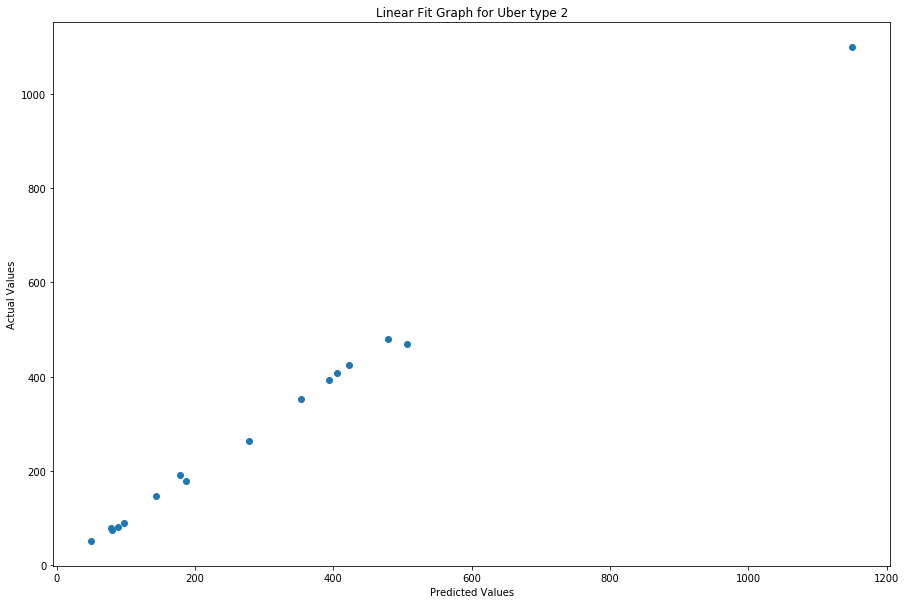

In [47]:
plt.scatter(combined_type_2_pred,combined_type_2_y_test['Fare$'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Fit Graph for Uber type 2')

We can also see the Accuracy of the model through R-square of each model

In [48]:
print ('r-squared for model with uber type 0 = ',l0.score(combined_type_0_X_test,combined_type_0_y_test))
print ('r-squared for this model with uber type 0 = ',l1.score(combined_type_1_X_test,combined_type_1_y_test))
print ('r-squared for this model with uber type 0 = ',l2.score(combined_type_2_X_test,combined_type_2_y_test))


r-squared for model with uber type 0 =  0.9103670049476642
r-squared for this model with uber type 0 =  0.9974226763753317
r-squared for this model with uber type 0 =  0.9955061838658273


Now that we are sure of the model's accuracy, we will use the model by combining training and testing data (used above) to train the model to predict missing values

In [49]:
l0 = LinearRegression() #instatiate
l1 = LinearRegression() #instatiate
l2= LinearRegression() #instatiate
l0.fit(combined_train_0.iloc[:,2:-1], combined_train_0.iloc[:,-1:]) #fit
l1.fit(combined_train_1.iloc[:,2:-1], combined_train_1.iloc[:,-1:]) #fit
l2.fit(combined_train_2.iloc[:,2:-1], combined_train_2.iloc[:,-1:]) #fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
missing_to_be_predicted_0=missing_to_be_predicted[missing_to_be_predicted["Uber Type"]==0]
missing_to_be_predicted_1=missing_to_be_predicted[missing_to_be_predicted["Uber Type"]==1]
missing_to_be_predicted_2=missing_to_be_predicted[missing_to_be_predicted["Uber Type"]==2]

In [51]:
missing_to_be_predicted_0['Fare$']=l0.predict(missing_to_be_predicted_0[[x for x in missing_to_be_predicted_0.columns if x not in ('Fare$','Uber Type',"Unnamed: 0")]]) 
missing_to_be_predicted_1['Fare$']=l1.predict(missing_to_be_predicted_1[[x for x in missing_to_be_predicted_1.columns if x not in ('Fare$','Uber Type',"Unnamed: 0")]]) 
missing_to_be_predicted_2['Fare$']=l2.predict(missing_to_be_predicted_2[[x for x in missing_to_be_predicted_2.columns if x not in ("Unnamed: 0",'Fare$','Uber Type')]]) 

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [52]:
predicted_final= pd.concat([missing_to_be_predicted_0,missing_to_be_predicted_1,missing_to_be_predicted_2], axis=0)
predicted_final

,Unnamed: 0,Uber Type,Journey Distance(m),Travel Time(s),Is_weekend,time_of_the_day,Fare$
55,ID1922308355,0,7272.0,1673.40,1,1,13.536559
61,ID1122577843,0,9609.0,2757.78,0,1,12.363919
62,ID1411987224,0,3674.0,949.08,0,1,9.712479
68,ID1192578709,0,44262.0,10696.68,1,2,31.568623
80,ID1295746867,0,42468.0,10182.72,0,2,28.150115
83,ID1618332481,0,47033.0,11355.66,0,1,25.771741
96,ID1318514095,0,11711.0,3866.94,1,2,20.671716
56,ID3201113277,1,11188.0,3573.84,1,2,35.946900
57,ID3895623960,1,8781.0,2996.94,1,1,28.325665
66,ID3641203175,1,13071.0,3905.70,0,1,28.792941


Now, We will merge the predicted values to the original missing file and drop the unwanted column 

In [53]:
def fix_it(ids):
    return(round(float(predicted_final[predicted_final["Unnamed: 0"]==ids]["Fare$"]),2))


missing.loc[missing['Fare$'].isna(),"Fare$"] = missing[missing['Fare$'].isna()]['Unnamed: 0'].apply(fix_it)

In [54]:
missing = missing.drop(columns="Is_weekend")
missing = missing.drop(columns="time_of_the_day")

missing

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3508455764,1,5,6,-37.801155,144.918667,-37.773845,144.983689,8134.0,2018-01-04,19:32:21,1871.64,20:03:32,19.46
1,ID1849515263,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-04-04,22:02:07,11355.66,1:11:22,22.64
2,ID5400045312,2,8,5,-37.815834,145.046450,-37.802420,144.934978,10567.0,2018-06-18,11:19:04,2965.14,12:08:29,262.40
3,ID1672983032,0,3,8,-37.811146,144.978516,-37.815834,145.046450,6193.0,2018-02-24,11:31:23,1822.32,12:01:45,8.45
4,ID1503368443,0,2,9,-37.815095,144.941201,-38.110916,144.654173,42220.0,2018-02-05,12:40:11,10119.42,15:28:50,17.23
5,ID5119479640,2,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-02-23,15:05:20,5320.68,16:34:00,468.44
6,ID1164242843,0,2,3,-37.814824,144.937649,-37.813183,144.973911,3812.0,2018-07-11,15:01:32,957.48,15:17:29,9.27
7,ID1511092255,0,6,5,-37.773845,144.983689,-37.809116,144.931933,7455.0,2018-04-10,06:47:44,1618.32,7:14:42,2.33
8,ID1151369117,0,1,9,-37.820854,144.954921,-38.110916,144.654173,42648.0,2018-05-06,03:47:58,10241.52,6:38:39,25.49
9,ID3778629567,1,5,4,-37.816432,144.928439,-37.805456,144.997162,7520.0,2018-05-20,08:52:22,1953.96,9:24:55,18.74


Storing the final result in the file.

In [55]:
missing_new = missing.copy()
missing.set_index('Unnamed: 0',inplace=True)
missing.index.names=['']
missing.to_csv('29858186_missing_value_solution.csv')
missing =missing_new.copy()
missing

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3508455764,1,5,6,-37.801155,144.918667,-37.773845,144.983689,8134.0,2018-01-04,19:32:21,1871.64,20:03:32,19.46
1,ID1849515263,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-04-04,22:02:07,11355.66,1:11:22,22.64
2,ID5400045312,2,8,5,-37.815834,145.046450,-37.802420,144.934978,10567.0,2018-06-18,11:19:04,2965.14,12:08:29,262.40
3,ID1672983032,0,3,8,-37.811146,144.978516,-37.815834,145.046450,6193.0,2018-02-24,11:31:23,1822.32,12:01:45,8.45
4,ID1503368443,0,2,9,-37.815095,144.941201,-38.110916,144.654173,42220.0,2018-02-05,12:40:11,10119.42,15:28:50,17.23
5,ID5119479640,2,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-02-23,15:05:20,5320.68,16:34:00,468.44
6,ID1164242843,0,2,3,-37.814824,144.937649,-37.813183,144.973911,3812.0,2018-07-11,15:01:32,957.48,15:17:29,9.27
7,ID1511092255,0,6,5,-37.773845,144.983689,-37.809116,144.931933,7455.0,2018-04-10,06:47:44,1618.32,7:14:42,2.33
8,ID1151369117,0,1,9,-37.820854,144.954921,-38.110916,144.654173,42648.0,2018-05-06,03:47:58,10241.52,6:38:39,25.49
9,ID3778629567,1,5,4,-37.816432,144.928439,-37.805456,144.997162,7520.0,2018-05-20,08:52:22,1953.96,9:24:55,18.74


## 6. Fixing Outliers 

It is known that there are outliers in the Fare column and before proceeding to fix it, we will check the statistics of data to ensure there are no further anomalies in the dataset. 

In [56]:
outliers.describe()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,40.500000,0.682927,5.012195,4.646341,-37.862939,144.917017,-37.839304,144.944791,16067.609756,4176.760976,88.217500
std,23.815261,0.700583,2.755439,2.583767,0.109713,0.120856,0.079455,0.091504,16987.357931,4151.355604,250.907193
min,0.000000,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1979.000000,524.940000,4.960000
25%,20.250000,0.000000,2.250000,2.000000,-37.853063,144.908648,-37.824111,144.935498,4807.250000,1208.955000,9.735000
50%,40.500000,1.000000,5.000000,4.000000,-37.815834,144.947490,-37.815834,144.960647,8225.500000,2610.210000,17.970000
75%,60.750000,1.000000,7.750000,7.000000,-37.807202,144.989964,-37.809752,144.993880,13412.250000,4147.965000,29.405000
max,81.000000,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773845,145.046450,51032.000000,13204.980000,1315.560000


Now, that we know there are no more anomalies in the data, we will check the distribution of the Fare through a histogram

Text(0.5,1,'Distribution of Fare')

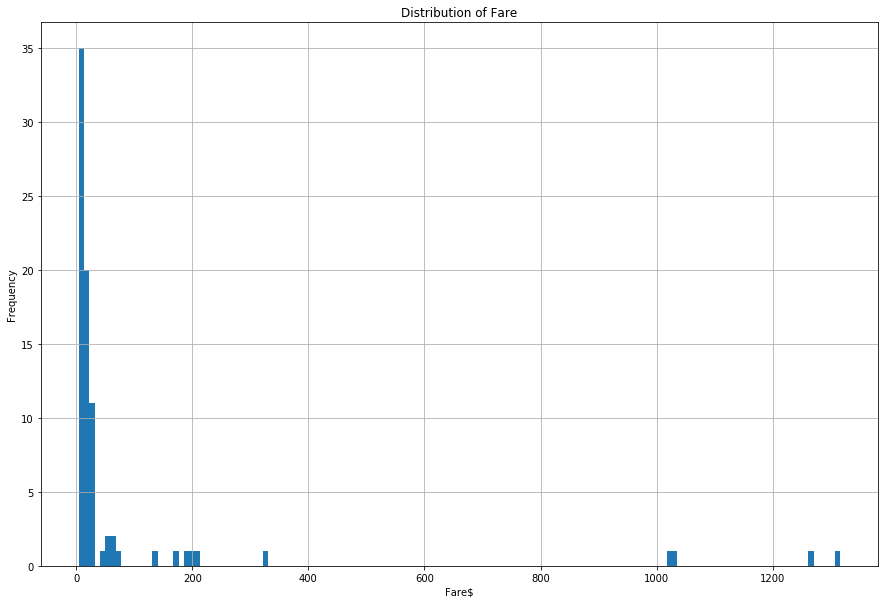

In [57]:
plt.rcParams['figure.figsize']=15,10

outliers['Fare$'].hist(bins='auto')
plt.xlabel("Fare$")
plt.ylabel("Frequency")
plt.title ("Distribution of Fare")

From the below graphs, it is evident that there are some outliers in the fare column and needs to be fixed.

Text(0.5,1,'Boxplot of Fare')

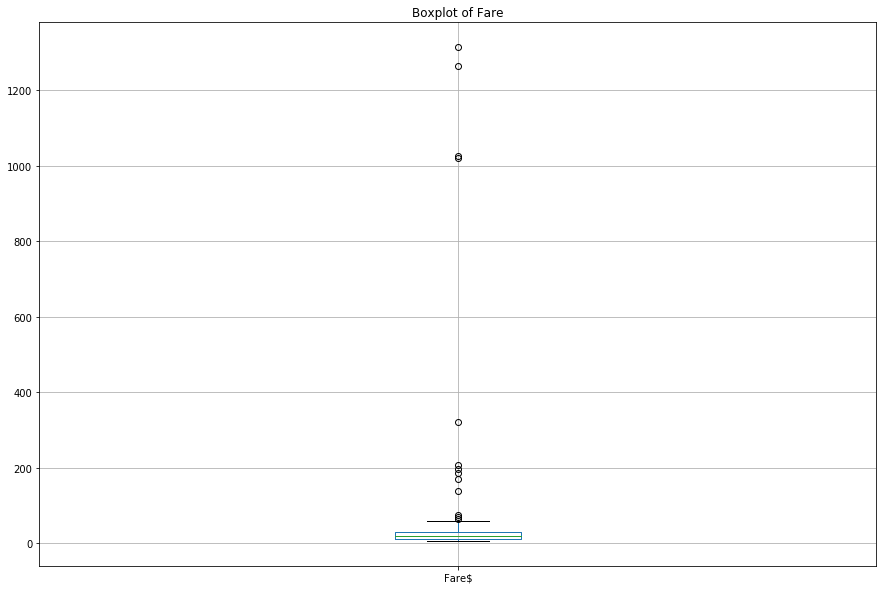

In [58]:
outliers.boxplot('Fare$')
plt.title ("Boxplot of Fare")

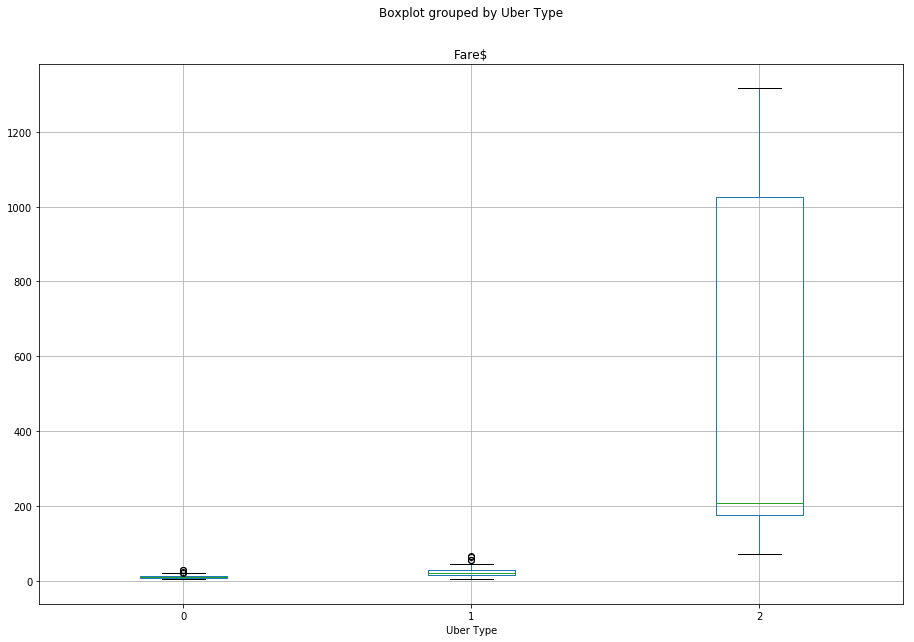

In [59]:
outliers.boxplot('Fare$', by="Uber Type")

From the above boxplot, we can identify that there are certain outliers for each Uber type and we can explore them in our data set

In [60]:
outliers[(outliers["Uber Type"]==0) & (outliers['Fare$']>25) ]

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID1506565122,0,9,3,-38.110916,144.654173,-37.819446,145.008458,47534.0,2018-07-08,00:09:22,11557.08,3:21:59,30.05
21,21,ID1728694411,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-04-08,04:09:47,13173.36,7:49:20,30.28
53,53,ID1605222351,0,9,4,-38.110916,144.654173,-37.811281,145.002073,47057.0,2018-03-10,14:23:12,11253.24,17:30:45,25.38


In [61]:
outliers[(outliers["Uber Type"]==1) & (outliers['Fare$']>50) ]

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
7,7,ID3931269503,1,9,4,-38.110916,144.654173,-37.802404,144.995009,46997.0,2018-04-09,17:23:11,11384.88,20:32:55,57.08
10,10,ID3404110162,1,9,1,-38.110916,144.654173,-37.814716,144.940084,42350.0,2018-02-18,02:43:36,10166.22,5:33:02,64.02
17,17,ID3956232937,1,1,9,-37.822192,144.947664,-38.110916,144.654173,41967.0,2018-06-20,02:04:14,10084.98,4:52:18,57.52
40,40,ID3945648487,1,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-07-04,02:41:49,13204.98,6:21:53,68.10


Uptill now, we identified the outliers through visualisation. 
Now we will explore more on to the outliers through residuals and possibly remove them.

To generate residuals we will pass the file through Linear model and will create all the columns required to generate the linear model (As we have seen earlier)

In [62]:
def check_weekend (date):
    weekno = pd.to_datetime(date).weekday()
    if weekno<5:
        return 0
    else:
        return 1


outliers['Is_weekend']= outliers['Departure Date'].apply(check_weekend)

#https://stackoverflow.com/questions/29384696/how-to-find-current-day-is-weekday-or-weekends-in-python

outliers


,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend
0,0,ID1506565122,0,9,3,-38.110916,144.654173,-37.819446,145.008458,47534.0,2018-07-08,00:09:22,11557.08,3:21:59,30.050,1
1,1,ID5185328200,2,1,7,-37.814264,144.947316,-37.861835,144.905716,9449.0,2018-05-11,09:47:43,3166.92,10:40:29,321.350,0
2,2,ID5120693966,2,3,5,-37.816742,144.991126,-37.809771,144.930046,6886.0,2018-07-07,05:19:41,1643.70,5:47:04,195.900,1
3,3,ID1802488340,0,9,2,-38.110916,144.654173,-37.825139,144.936448,43337.0,2018-04-02,10:18:08,10466.64,13:12:34,16.980,0
4,4,ID3666396521,1,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-05-23,07:55:59,13204.98,11:36:03,29.955,0
5,5,ID3999870987,1,6,5,-37.790797,144.985865,-37.802834,144.935456,6597.0,2018-01-21,07:15:42,1869.30,7:46:51,19.280,1
6,6,ID5353026136,2,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-07-12,23:20:31,12681.06,2:51:52,1264.820,0
7,7,ID3931269503,1,9,4,-38.110916,144.654173,-37.802404,144.995009,46997.0,2018-04-09,17:23:11,11384.88,20:32:55,57.080,0
8,8,ID1976732736,0,7,6,-37.861835,144.905716,-37.787433,144.980377,11633.0,2018-04-09,18:02:46,3645.30,19:03:31,12.410,0
9,9,ID3291225560,1,3,6,-37.820094,144.980496,-37.773845,144.983689,6763.0,2018-03-02,09:49:30,1535.40,10:15:05,4.960,0


In [63]:

def time_of_day(time):
    hr = time
#     print(hr)
#     hr = pd.to_datetime(time).dt.hour
    if hr <=11 and hr>=6:
        return 0
    if hr>=12 and hr<=20:
        return 1
    if hr>=21 or hr <=5:
        return 2
# dirty_new['Departure Time']

outliers ["time_of_the_day"]=pd.to_datetime(outliers["Departure Time"]).dt.hour.apply(time_of_day)
outliers


,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend,time_of_the_day
0,0,ID1506565122,0,9,3,-38.110916,144.654173,-37.819446,145.008458,47534.0,2018-07-08,00:09:22,11557.08,3:21:59,30.050,1,2
1,1,ID5185328200,2,1,7,-37.814264,144.947316,-37.861835,144.905716,9449.0,2018-05-11,09:47:43,3166.92,10:40:29,321.350,0,0
2,2,ID5120693966,2,3,5,-37.816742,144.991126,-37.809771,144.930046,6886.0,2018-07-07,05:19:41,1643.70,5:47:04,195.900,1,2
3,3,ID1802488340,0,9,2,-38.110916,144.654173,-37.825139,144.936448,43337.0,2018-04-02,10:18:08,10466.64,13:12:34,16.980,0,0
4,4,ID3666396521,1,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-05-23,07:55:59,13204.98,11:36:03,29.955,0,0
5,5,ID3999870987,1,6,5,-37.790797,144.985865,-37.802834,144.935456,6597.0,2018-01-21,07:15:42,1869.30,7:46:51,19.280,1,0
6,6,ID5353026136,2,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-07-12,23:20:31,12681.06,2:51:52,1264.820,0,2
7,7,ID3931269503,1,9,4,-38.110916,144.654173,-37.802404,144.995009,46997.0,2018-04-09,17:23:11,11384.88,20:32:55,57.080,0,1
8,8,ID1976732736,0,7,6,-37.861835,144.905716,-37.787433,144.980377,11633.0,2018-04-09,18:02:46,3645.30,19:03:31,12.410,0,1
9,9,ID3291225560,1,3,6,-37.820094,144.980496,-37.773845,144.983689,6763.0,2018-03-02,09:49:30,1535.40,10:15:05,4.960,0,0


Before Fixing the Outliers we will generate a graph to compare residual and fitted points for each Uber type

Text(0.5,1,'Residual VS Fitted for Fare of Uber Type 0')

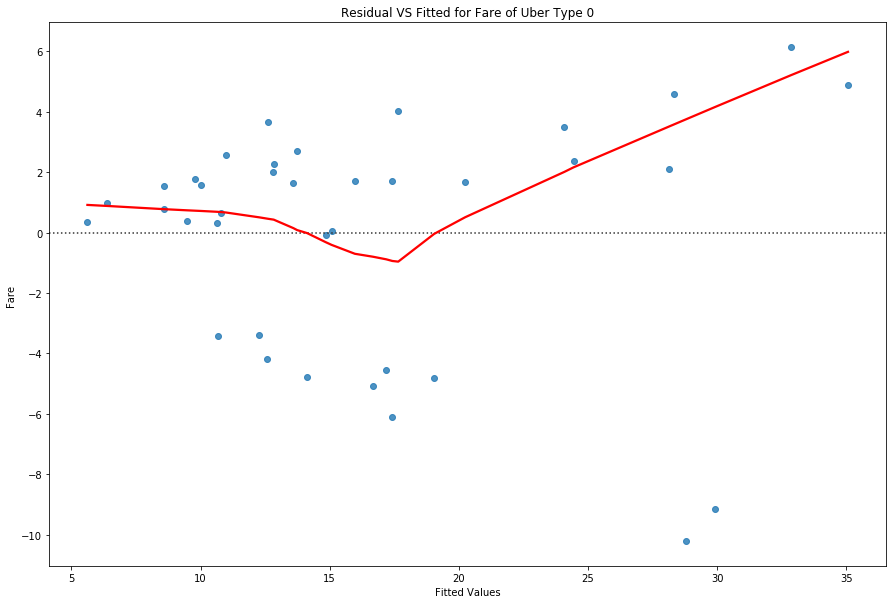

In [64]:
outliers.loc[outliers['Uber Type']==0,'Predicted_Fare'] =l0.predict(outliers[outliers['Uber Type']==0][['Journey Distance(m)','Travel Time(s)','Is_weekend','time_of_the_day']])
sns.residplot(outliers[outliers['Uber Type']==0]['Predicted_Fare'],outliers[outliers['Uber Type']==0]['Fare$'],lowess=True,line_kws={'color': 'red'} )
plt.xlabel('Fitted Values')
plt.ylabel('Fare ')
plt.title('Residual VS Fitted for Fare of Uber Type 0')
#Waskom, M. (2018). Retrieved from PyData: https://seaborn.pydata.org/tutorial/regression.html

For Uber type 1

Text(0.5,1,'Residual VS Fitted for Fare of Uber Type 1')

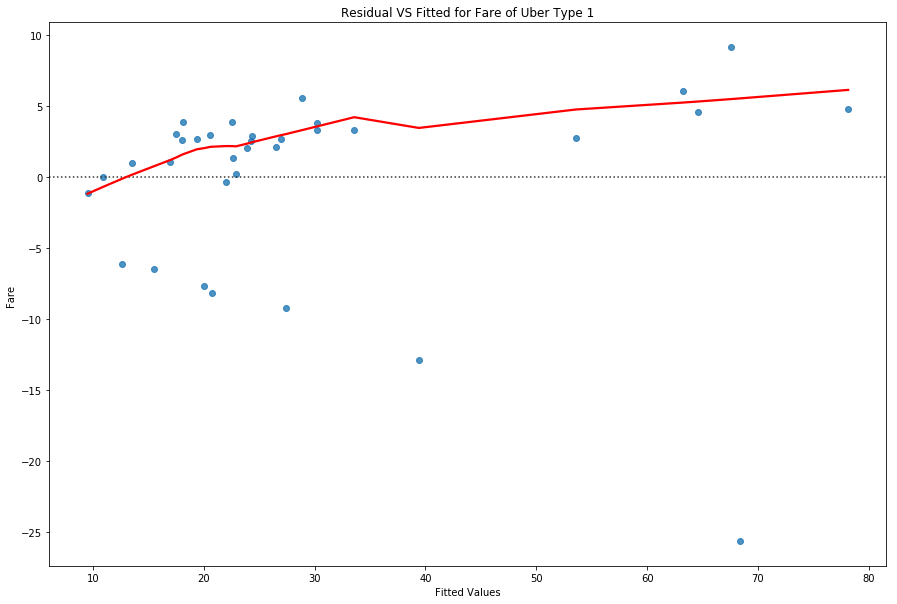

In [65]:
outliers.loc[outliers['Uber Type']==1,'Predicted_Fare'] =l1.predict(outliers[outliers['Uber Type']==1][['Journey Distance(m)','Travel Time(s)','Is_weekend','time_of_the_day']])
sns.residplot(outliers[outliers['Uber Type']==1]['Predicted_Fare'],outliers[outliers['Uber Type']==1]['Fare$'],lowess=True,line_kws={'color': 'red'} )
plt.xlabel('Fitted Values')
plt.ylabel('Fare ')
plt.title('Residual VS Fitted for Fare of Uber Type 1')

for uber type 2

Text(0.5,1,'Residual VS Fitted for Fare of Uber Type 2')

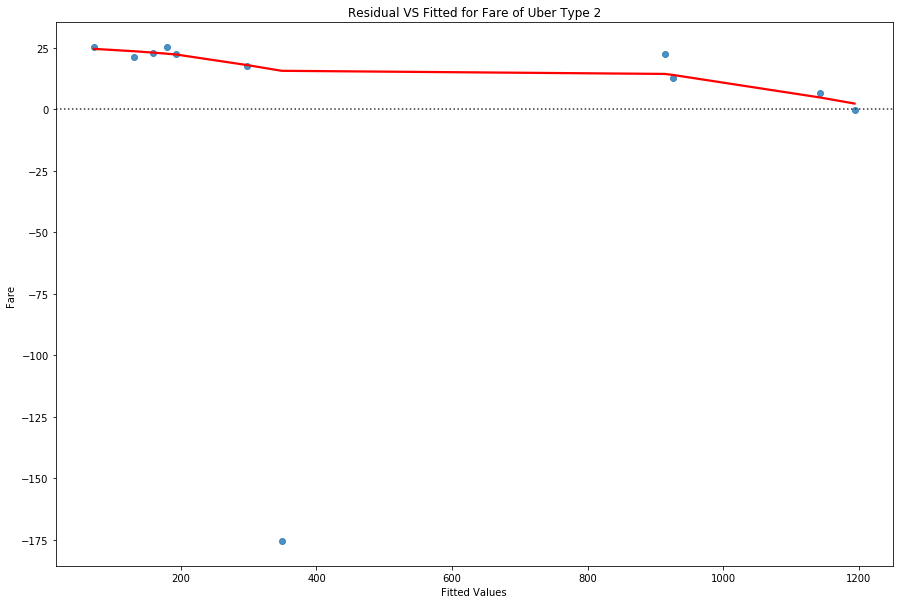

In [66]:
outliers.loc[outliers['Uber Type']==2,'Predicted_Fare'] =l2.predict(outliers[outliers['Uber Type']==2][['Journey Distance(m)','Travel Time(s)','Is_weekend','time_of_the_day']])
sns.residplot(outliers[outliers['Uber Type']==2]['Predicted_Fare'],outliers[outliers['Uber Type']==2]['Fare$'],lowess=True,line_kws={'color': 'red'} )
plt.xlabel('Fitted Values')
plt.ylabel('Fare ')
plt.title('Residual VS Fitted for Fare of Uber Type 2')

Now, I have created a Residual column which will contain the values of Fare Residual, which will be later used in a boxplot to identify the outliers.

In [67]:
# # outliers[(outliers['Uber Type']==2)].boxplot('Fare$'-'Predicted_Fare')
outliers["Residual"]=outliers ['Fare$']- outliers['Predicted_Fare']

Text(0.5,1,'Boxplot of Fare Residuals')

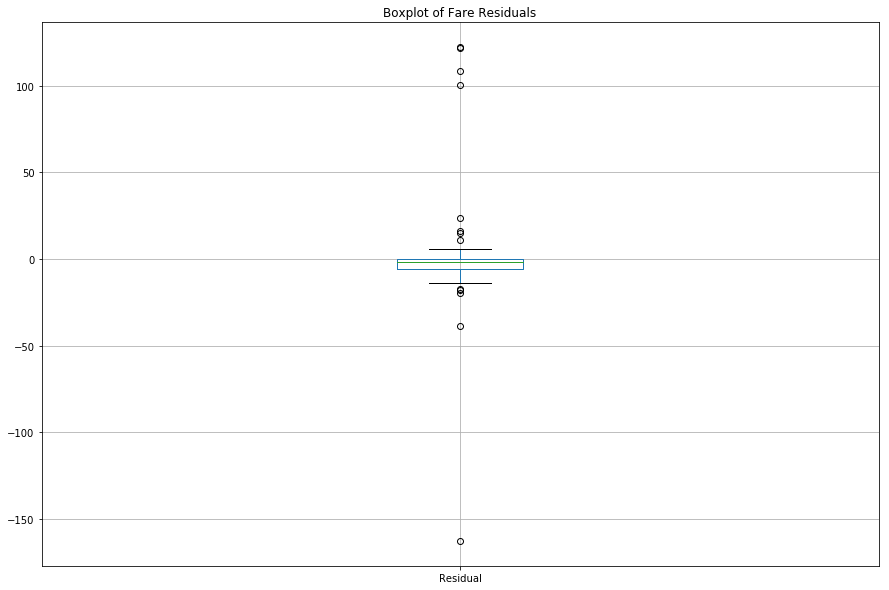

In [68]:
outliers.boxplot("Residual")
plt.title("Boxplot of Fare Residuals")

It can be observed that there are some outliers in the residual and it needs to be removed. 

To remove the outliers, I have used the method of IQR score which calculate statistical dispersion between 3rd (0.75) Quartile and 1st (0.25) Quartile which is similar to Z score.

In [69]:
Q1=outliers['Residual'].quantile(0.25)
Q3=outliers['Residual'].quantile(0.75)

In [70]:
IQR= Q3-Q1
Q1

-5.634754280623056

In [71]:
#Upper Limit
Q3+(IQR*1.5)

8.237442412942663

In [72]:
#Lower Limit
Q1-(IQR*1.5)

-13.958072296762488

Below are the outliers detected

In [73]:
outliers[outliers['Residual']<Q1-(IQR*1.5)]

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend,time_of_the_day,Predicted_Fare,Residual
4,4,ID3666396521,1,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-05-23,07:55:59,13204.98,11:36:03,29.955,0,0,68.413253,-38.458253
24,24,ID1182457459,0,9,4,-38.110916,144.654173,-37.803328,144.994517,46879.0,2018-01-05,23:54:20,11357.10,3:03:37,12.765,0,2,29.920330,-17.155330
32,32,ID5486847573,2,5,7,-37.806476,144.932217,-37.861835,144.905716,11000.0,2018-06-06,01:43:36,3514.20,2:42:10,185.750,0,2,348.663101,-162.913101
34,34,ID1661561393,0,9,3,-38.110916,144.654173,-37.820921,144.968893,44123.0,2018-03-07,23:42:31,10611.42,2:39:22,10.925,0,2,28.800230,-17.875230
59,59,ID3880654926,1,8,7,-37.807202,145.026637,-37.861835,144.905716,13986.0,2018-02-03,05:00:59,4298.28,6:12:37,19.540,1,2,39.410752,-19.870752


In [74]:
outliers[outliers['Residual']>Q3+(IQR*1.5)]

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend,time_of_the_day,Predicted_Fare,Residual
1,1,ID5185328200,2,1,7,-37.814264,144.947316,-37.861835,144.905716,9449.0,2018-05-11,09:47:43,3166.92,10:40:29,321.35,0,0,297.834614,23.515386
2,2,ID5120693966,2,3,5,-37.816742,144.991126,-37.809771,144.930046,6886.0,2018-07-07,05:19:41,1643.70,5:47:04,195.90,1,2,179.950803,15.949197
6,6,ID5353026136,2,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-07-12,23:20:31,12681.06,2:51:52,1264.82,0,2,1142.432905,122.387095
12,12,ID5268321189,2,9,2,-38.110916,144.654173,-37.825246,144.950734,42454.0,2018-03-22,22:52:42,10239.60,1:43:21,1026.57,0,2,926.303427,100.266573
13,13,ID5632669988,2,2,6,-37.816143,144.928748,-37.787433,144.980377,7640.0,2018-03-06,18:33:08,1925.64,19:05:13,207.27,0,1,192.587114,14.682886
26,26,ID5367955454,2,9,2,-38.110916,144.654173,-37.813941,144.935756,42872.0,2018-01-28,11:54:39,10307.52,14:46:26,1021.91,1,0,913.515426,108.394574
56,56,ID5824912455,2,4,3,-37.802351,145.009560,-37.819952,144.968513,4942.0,2018-05-26,02:01:50,1376.16,2:24:46,169.31,1,2,158.541124,10.768876
61,61,ID5818025555,2,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-02-22,01:07:38,13204.98,4:47:42,1315.56,0,2,1193.514688,122.045312


Removing the outliers

In [75]:
outliers=outliers[outliers['Residual']>Q1-(IQR*1.5)]
outliers=outliers[outliers['Residual']<Q3+(IQR*1.5)]
outliers

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend,time_of_the_day,Predicted_Fare,Residual
0,0,ID1506565122,0,9,3,-38.110916,144.654173,-37.819446,145.008458,47534.0,2018-07-08,00:09:22,11557.08,3:21:59,30.050,1,2,32.869075,-2.819075
3,3,ID1802488340,0,9,2,-38.110916,144.654173,-37.825139,144.936448,43337.0,2018-04-02,10:18:08,10466.64,13:12:34,16.980,0,0,20.240198,-3.260198
5,5,ID3999870987,1,6,5,-37.790797,144.985865,-37.802834,144.935456,6597.0,2018-01-21,07:15:42,1869.30,7:46:51,19.280,1,0,18.094027,1.185973
7,7,ID3931269503,1,9,4,-38.110916,144.654173,-37.802404,144.995009,46997.0,2018-04-09,17:23:11,11384.88,20:32:55,57.080,0,1,64.603177,-7.523177
8,8,ID1976732736,0,7,6,-37.861835,144.905716,-37.787433,144.980377,11633.0,2018-04-09,18:02:46,3645.30,19:03:31,12.410,0,1,13.587447,-1.177447
9,9,ID3291225560,1,3,6,-37.820094,144.980496,-37.773845,144.983689,6763.0,2018-03-02,09:49:30,1535.40,10:15:05,4.960,0,0,12.626212,-7.666212
10,10,ID3404110162,1,9,1,-38.110916,144.654173,-37.814716,144.940084,42350.0,2018-02-18,02:43:36,10166.22,5:33:02,64.020,1,2,67.523420,-3.503420
11,11,ID1757930623,0,5,4,-37.806472,144.932516,-37.813170,145.009690,7287.0,2018-05-19,14:57:33,1844.28,15:28:17,13.560,1,1,13.739433,-0.179433
14,14,ID1399837818,0,5,3,-37.810169,144.936561,-37.810615,144.983065,4578.0,2018-04-03,16:48:26,1137.84,17:07:23,9.900,0,1,10.014028,-0.114028
15,15,ID3716846541,1,1,5,-37.809683,144.946820,-37.804428,144.928249,1979.0,2018-05-03,04:38:11,524.94,4:46:55,18.010,0,2,17.508366,0.501634


As evident below, after removing the outliers we will recheck and see if outliers exist in the new dataset.

Text(0.5,1,'Boxplot of Fare Residuals')

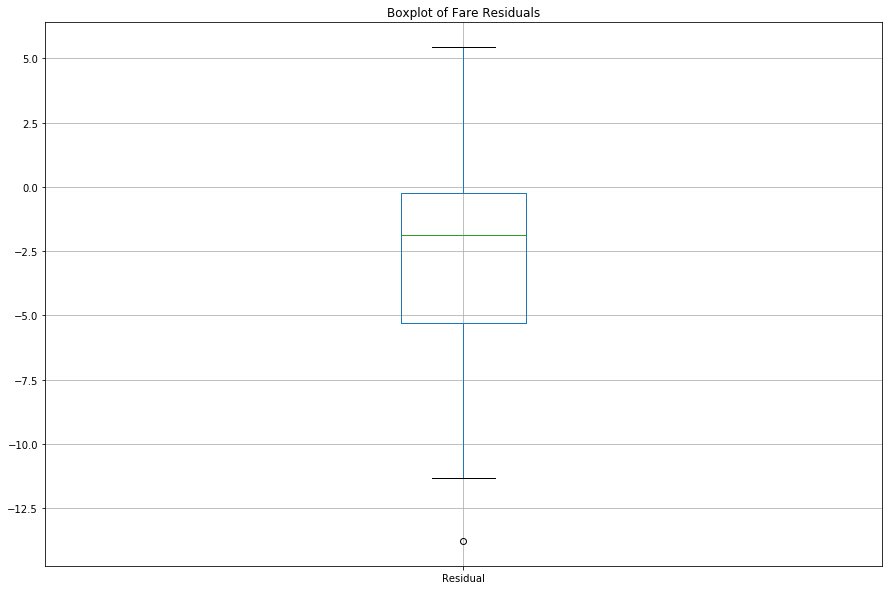

In [76]:
outliers.boxplot("Residual")
plt.title("Boxplot of Fare Residuals")

As, we can see there are still some outliers exist, therefore we will repeat the steps and remove the outliers

In [77]:
Q1=outliers['Residual'].quantile(0.25)
Q3=outliers['Residual'].quantile(0.75)

In [78]:
IQR = Q3-Q1
IQR

5.079012689903779

In [79]:
outliers=outliers[outliers['Residual']>Q1-(IQR*1.5)]
outliers=outliers[outliers['Residual']<Q3+(IQR*1.5)]
outliers

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Is_weekend,time_of_the_day,Predicted_Fare,Residual
0,0,ID1506565122,0,9,3,-38.110916,144.654173,-37.819446,145.008458,47534.0,2018-07-08,00:09:22,11557.08,3:21:59,30.050,1,2,32.869075,-2.819075
3,3,ID1802488340,0,9,2,-38.110916,144.654173,-37.825139,144.936448,43337.0,2018-04-02,10:18:08,10466.64,13:12:34,16.980,0,0,20.240198,-3.260198
5,5,ID3999870987,1,6,5,-37.790797,144.985865,-37.802834,144.935456,6597.0,2018-01-21,07:15:42,1869.30,7:46:51,19.280,1,0,18.094027,1.185973
7,7,ID3931269503,1,9,4,-38.110916,144.654173,-37.802404,144.995009,46997.0,2018-04-09,17:23:11,11384.88,20:32:55,57.080,0,1,64.603177,-7.523177
8,8,ID1976732736,0,7,6,-37.861835,144.905716,-37.787433,144.980377,11633.0,2018-04-09,18:02:46,3645.30,19:03:31,12.410,0,1,13.587447,-1.177447
9,9,ID3291225560,1,3,6,-37.820094,144.980496,-37.773845,144.983689,6763.0,2018-03-02,09:49:30,1535.40,10:15:05,4.960,0,0,12.626212,-7.666212
10,10,ID3404110162,1,9,1,-38.110916,144.654173,-37.814716,144.940084,42350.0,2018-02-18,02:43:36,10166.22,5:33:02,64.020,1,2,67.523420,-3.503420
11,11,ID1757930623,0,5,4,-37.806472,144.932516,-37.813170,145.009690,7287.0,2018-05-19,14:57:33,1844.28,15:28:17,13.560,1,1,13.739433,-0.179433
14,14,ID1399837818,0,5,3,-37.810169,144.936561,-37.810615,144.983065,4578.0,2018-04-03,16:48:26,1137.84,17:07:23,9.900,0,1,10.014028,-0.114028
15,15,ID3716846541,1,1,5,-37.809683,144.946820,-37.804428,144.928249,1979.0,2018-05-03,04:38:11,524.94,4:46:55,18.010,0,2,17.508366,0.501634


After removing the outlier, we will again verify our result and see if there are still any outliers. 

We can verify the same visually by plotting the boxplot and residual graph to confirm the same.

Text(0.5,1,'Boxplot of Fare Residuals')

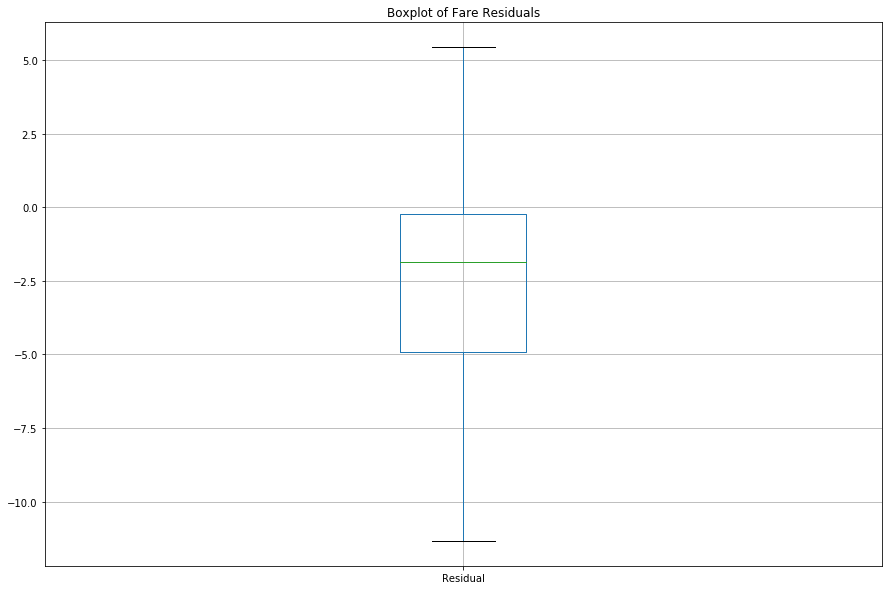

In [80]:
outliers.boxplot("Residual")
plt.title("Boxplot of Fare Residuals")

Text(0.5,1,'Residual VS Fitted for Fare of Uber Type 2')

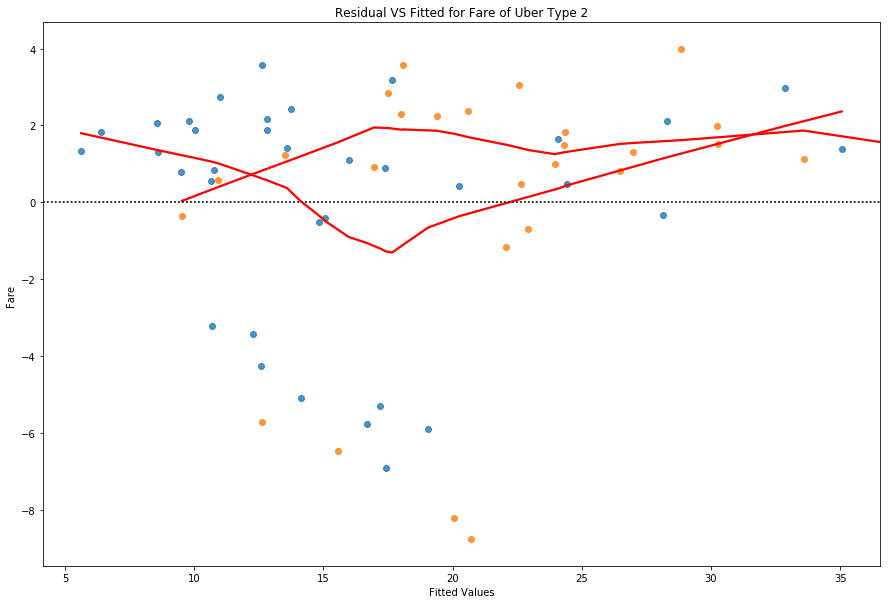

In [81]:
sns.residplot(outliers[outliers['Uber Type']==0]['Predicted_Fare'],outliers[outliers['Uber Type']==0]['Fare$'],lowess=True,line_kws={'color': 'red'} )
sns.residplot(outliers[outliers['Uber Type']==1]['Predicted_Fare'],outliers[outliers['Uber Type']==1]['Fare$'],lowess=True,line_kws={'color': 'red'} )
sns.residplot(outliers[outliers['Uber Type']==2]['Predicted_Fare'],outliers[outliers['Uber Type']==2]['Fare$'],lowess=True,line_kws={'color': 'red'} )
plt.xlabel('Fitted Values')
plt.ylabel('Fare ')
plt.title('Residual VS Fitted for Fare of Uber Type 2')

Fixing the format of the data in accordance with the expected output

In [83]:
#Writing to file
outliers = outliers.drop(columns="Is_weekend")
outliers = outliers.drop(columns="time_of_the_day")
outliers = outliers.drop(columns="Predicted_Fare")
outliers = outliers.drop(columns="Residual")
outliers_new= outliers.copy()
outliers.set_index('Unnamed: 0',inplace=True)
outliers.index.names=['']
outliers.to_csv('29858186_outliers_solution.csv')
outliers=outliers_new.copy()
outliers

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID1506565122,0,9,3,-38.110916,144.654173,-37.819446,145.008458,47534.0,2018-07-08,00:09:22,11557.08,3:21:59,30.050
3,3,ID1802488340,0,9,2,-38.110916,144.654173,-37.825139,144.936448,43337.0,2018-04-02,10:18:08,10466.64,13:12:34,16.980
5,5,ID3999870987,1,6,5,-37.790797,144.985865,-37.802834,144.935456,6597.0,2018-01-21,07:15:42,1869.30,7:46:51,19.280
7,7,ID3931269503,1,9,4,-38.110916,144.654173,-37.802404,144.995009,46997.0,2018-04-09,17:23:11,11384.88,20:32:55,57.080
8,8,ID1976732736,0,7,6,-37.861835,144.905716,-37.787433,144.980377,11633.0,2018-04-09,18:02:46,3645.30,19:03:31,12.410
9,9,ID3291225560,1,3,6,-37.820094,144.980496,-37.773845,144.983689,6763.0,2018-03-02,09:49:30,1535.40,10:15:05,4.960
10,10,ID3404110162,1,9,1,-38.110916,144.654173,-37.814716,144.940084,42350.0,2018-02-18,02:43:36,10166.22,5:33:02,64.020
11,11,ID1757930623,0,5,4,-37.806472,144.932516,-37.813170,145.009690,7287.0,2018-05-19,14:57:33,1844.28,15:28:17,13.560
14,14,ID1399837818,0,5,3,-37.810169,144.936561,-37.810615,144.983065,4578.0,2018-04-03,16:48:26,1137.84,17:07:23,9.900
15,15,ID3716846541,1,1,5,-37.809683,144.946820,-37.804428,144.928249,1979.0,2018-05-03,04:38:11,524.94,4:46:55,18.010


## 7. Conclusion

I have identified multiple issues in the dataset and fixed them. Below is the quick summary of the issues identified. 
* **Dirty Data**
>* Negative sign of Destination/Origin Longitude was missing.
>* Wrong Destination and Origin regions.
>* Wrong Uber type.
>* Format of Departure date was wrong.
>* Wrong Journey Distance.
>* Wrong Travel Time.
>* Wrong Arrival and Departure Times.
* **Missing Data**
>* Missing Data in Uber Type Column.
>* Missing Data in Fare Column.
* **Outliers**
>* Outliers were present in Fare Column


## 8. Reference 

* Soma, J. (2016). Retrieved from http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
* Zero. (2017, Aug 4). Retrieved from Stack Overflow: https://stackoverflow.com/questions/45504391/swapping-column-values-based-on-column-conditions-pandas-dataframe
* Fahad. (2015, April 1). Retrieved from Stackoverflow: https://stackoverflow.com/questions/29384696/how-to-find-current-day-is-weekday-or-weekends-in-python
* Waskom, M. (2018). Retrieved from PyData: https://seaborn.pydata.org/tutorial/regression.html

